## Yolov9 Model Running

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="7ZYtFs73KjjycuAgecED")
project = rf.workspace("jaswanth-zzdct").project("flood_affected_people_india")
version = project.version(2)
dataset = version.download("yolov9")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.1 MB/s eta 0:00:00
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
      Successfully uninstalled chardet-5.2.0
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Flood_affected_people_india-2 in yolov9:: 100%|██████████| 588/588 [00:00<00:00, 4912.78it/s]


In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 793.6/793.6 kB 7.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
from ultralytics import YOLO

# Build a YOLOv9c model from scratch
model = YOLO("yolov9c.yaml")

# Build a YOLOv9c model from pretrained weight
model = YOLO("yolov9c.pt")

# Display model information (optional)
model.info()

# Train the model on the COCO8 example dataset for 100 epochs
results = model.train(data="/content/Flood_affected_people_india-2/data.yaml", epochs=150, imgsz=640,batch=8)

# # Run inference with the YOLOv9c model on the 'bus.jpg' image
# results = model("path/to/bus.jpg")


YOLOv9c summary: 618 layers, 25590912 parameters, 0 gradients, 104.0 GFLOPs
Ultralytics YOLOv8.2.45 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov9c.pt, data=/content/Flood_affected_people_india-2/data.yaml, epochs=150, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_fram

100%|██████████| 755k/755k [00:00<00:00, 25.9MB/s]


Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  1    212864  ultralytics.nn.modules.block.RepNCSPELAN4    [128, 256, 128, 64, 1]        
  3                  -1  1    164352  ultralytics.nn.modules.block.ADown           [256, 256]                    
  4                  -1  1    847616  ultralytics.nn.modules.block.RepNCSPELAN4    [256, 512, 256, 128, 1]       
  5                  -1  1    656384  ultralytics.nn.modules.block.ADown           [512, 512]                    
  6                  -1  1   2857472  ultralytics.nn.modules.block.RepNCSPELAN4    [512, 512, 512, 256, 1]       
  7                  -1  1    656384  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 133MB/s]
Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)


AMP: checks passed ✅


train: Scanning /content/Flood_affected_people_india-2/train/labels... 252 images, 45 backgrounds, 0 corrupt: 100%|██████████| 252/252 [00:00<00:00, 605.79it/s]

train: New cache created: /content/Flood_affected_people_india-2/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 12, len(boxes) = 1114. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/Flood_affected_people_india-2/valid/labels... 24 images, 5 backgrounds, 0 corrupt: 100%|██████████| 24/24 [00:00<00:00, 286.86it/s]

val: New cache created: /content/Flood_affected_people_india-2/valid/labels.cache


WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 4, len(boxes) = 119. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.0005), 160 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150      6.12G      1.726      3.063      1.932         14        640: 100%|██████████| 32/32 [00:17<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.28s/it]

                   all         24        119      0.322     0.0873     0.0623     0.0274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150       5.9G      1.964      2.766      2.067         53        640: 100%|██████████| 32/32 [00:13<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.86it/s]

                   all         24        119      0.277      0.108     0.0182    0.00569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150       5.9G      1.978      2.677      2.104         16        640: 100%|██████████| 32/32 [00:12<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.85it/s]

                   all         24        119    0.00538      0.132    0.00328    0.00136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/150      5.89G      1.986      2.832      2.145         20        640: 100%|██████████| 32/32 [00:12<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.94it/s]

                   all         24        119      0.768     0.0753     0.0135     0.0047



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/150       5.9G      1.932      2.693      2.092         23        640: 100%|██████████| 32/32 [00:12<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]

                   all         24        119      0.257     0.0602    0.00487    0.00151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/150      5.89G      1.957      2.706      2.122         33        640: 100%|██████████| 32/32 [00:12<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.83it/s]

                   all         24        119      0.253      0.121    0.00181   0.000694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/150      5.87G       1.95      2.648      2.073         16        640: 100%|██████████| 32/32 [00:12<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.42it/s]


                   all         24        119      0.258      0.148    0.00721    0.00302

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/150      5.88G      1.882      2.595      2.064         20        640: 100%|██████████| 32/32 [00:13<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.89it/s]

                   all         24        119      0.797      0.108     0.0672     0.0189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/150      5.87G      1.907       2.57      2.062         36        640: 100%|██████████| 32/32 [00:13<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.77it/s]

                   all         24        119      0.801     0.0512     0.0802      0.025



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/150      5.88G       1.86      2.501      2.014         32        640: 100%|██████████| 32/32 [00:13<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.56it/s]


                   all         24        119      0.532     0.0723     0.0357     0.0129

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/150      5.88G      1.881      2.552      2.022         44        640: 100%|██████████| 32/32 [00:13<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.56it/s]

                   all         24        119      0.844     0.0904      0.066      0.023



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/150      5.89G      1.851      2.509      2.072         31        640: 100%|██████████| 32/32 [00:13<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.66it/s]

                   all         24        119      0.789     0.0873     0.0805     0.0312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/150      5.88G      1.829      2.532      2.028         46        640: 100%|██████████| 32/32 [00:13<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.65it/s]


                   all         24        119     0.0105      0.294     0.0135    0.00357

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/150      5.91G      1.781      2.548      1.951         23        640: 100%|██████████| 32/32 [00:13<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.25it/s]

                   all         24        119      0.768      0.105     0.0206    0.00826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/150      5.88G      1.756      2.475      1.941         40        640: 100%|██████████| 32/32 [00:13<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.79it/s]

                   all         24        119      0.853     0.0964      0.085     0.0335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/150       5.9G      1.747      2.427      1.936         23        640: 100%|██████████| 32/32 [00:12<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]

                   all         24        119      0.845     0.0572      0.107     0.0378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/150      5.89G      1.755      2.456      1.981         27        640: 100%|██████████| 32/32 [00:12<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.94it/s]

                   all         24        119      0.601     0.0783     0.0674     0.0231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/150      5.88G      1.793      2.395      1.972         51        640: 100%|██████████| 32/32 [00:12<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.29it/s]

                   all         24        119      0.835      0.101      0.137     0.0407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/150      5.87G      1.771      2.358      1.946         24        640: 100%|██████████| 32/32 [00:12<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]

                   all         24        119      0.868      0.105      0.101     0.0426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/150      5.87G      1.706      2.306      1.912         15        640: 100%|██████████| 32/32 [00:15<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]

                   all         24        119      0.841       0.12      0.146     0.0581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/150      5.87G      1.723      2.313      1.907         42        640: 100%|██████████| 32/32 [00:12<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.02it/s]

                   all         24        119      0.616      0.109      0.111     0.0432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/150      5.89G      1.694      2.284      1.897         32        640: 100%|██████████| 32/32 [00:13<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.93it/s]

                   all         24        119      0.626      0.135      0.175     0.0686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/150      5.88G      1.726      2.374      1.922         36        640: 100%|██████████| 32/32 [00:13<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.95it/s]

                   all         24        119      0.335      0.249      0.191     0.0669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/150      5.87G      1.681      2.335      1.919         25        640: 100%|██████████| 32/32 [00:13<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.73it/s]


                   all         24        119      0.889     0.0994      0.104     0.0425

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/150      5.89G      1.654      2.303      1.882         35        640: 100%|██████████| 32/32 [00:13<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.96it/s]

                   all         24        119      0.863     0.0964      0.101      0.041



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/150       5.9G      1.676      2.285      1.867         14        640: 100%|██████████| 32/32 [00:15<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]

                   all         24        119      0.587      0.102      0.131     0.0485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/150       5.9G      1.655      2.249      1.859         51        640: 100%|██████████| 32/32 [00:13<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.02it/s]

                   all         24        119      0.122      0.249      0.147     0.0545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/150      5.91G      1.614      2.218      1.827         37        640: 100%|██████████| 32/32 [00:13<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.00it/s]

                   all         24        119      0.638      0.151      0.175     0.0819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/150      5.88G      1.626      2.195      1.859         36        640: 100%|██████████| 32/32 [00:13<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.74it/s]

                   all         24        119      0.297      0.277      0.143     0.0636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/150      5.89G      1.603      2.166      1.843         28        640: 100%|██████████| 32/32 [00:13<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.18it/s]

                   all         24        119      0.317       0.29      0.192     0.0824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/150      5.92G      1.605       2.13      1.852         28        640: 100%|██████████| 32/32 [00:13<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.96it/s]

                   all         24        119        0.2      0.201      0.162     0.0841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/150      5.87G      1.615      2.071      1.794         41        640: 100%|██████████| 32/32 [00:12<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.27it/s]


                   all         24        119       0.21      0.292      0.235      0.113

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/150      5.87G      1.613      2.099      1.826         18        640: 100%|██████████| 32/32 [00:12<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.46it/s]


                   all         24        119      0.633      0.199       0.17     0.0735

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/150      5.89G      1.588      2.135      1.801         24        640: 100%|██████████| 32/32 [00:12<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.90it/s]


                   all         24        119      0.218      0.237       0.17      0.095

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/150      5.89G      1.581      2.101      1.793         42        640: 100%|██████████| 32/32 [00:13<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.04it/s]

                   all         24        119       0.64      0.173      0.173     0.0793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/150      5.89G      1.589      2.055      1.782         14        640: 100%|██████████| 32/32 [00:13<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.99it/s]

                   all         24        119      0.428       0.33      0.179     0.0798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/150      5.87G       1.61      2.064      1.794         48        640: 100%|██████████| 32/32 [00:13<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.01it/s]

                   all         24        119      0.237      0.311      0.182      0.076



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/150      5.89G      1.565      2.009       1.78         38        640: 100%|██████████| 32/32 [00:13<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.01it/s]

                   all         24        119      0.529      0.201      0.163     0.0759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/150      5.91G      1.567      2.085      1.783         31        640: 100%|██████████| 32/32 [00:13<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.85it/s]

                   all         24        119      0.255      0.216      0.165     0.0796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/150       5.9G      1.524      2.001      1.749         14        640: 100%|██████████| 32/32 [00:13<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]

                   all         24        119      0.171      0.291      0.161       0.08



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/150      5.88G      1.488      1.976      1.721         40        640: 100%|██████████| 32/32 [00:13<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.35it/s]

                   all         24        119      0.834      0.097      0.182     0.0928



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/150      5.88G      1.526      1.973      1.733         34        640: 100%|██████████| 32/32 [00:13<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.00it/s]

                   all         24        119      0.551      0.272      0.208     0.0833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/150       5.9G      1.535      1.967      1.756         26        640: 100%|██████████| 32/32 [00:13<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.99it/s]

                   all         24        119      0.559      0.255      0.217     0.0882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/150      5.88G      1.578      1.972      1.775         32        640: 100%|██████████| 32/32 [00:13<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.02it/s]

                   all         24        119      0.268      0.276      0.179     0.0779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/150      5.89G      1.528      1.957      1.767         28        640: 100%|██████████| 32/32 [00:13<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.07it/s]

                   all         24        119      0.361      0.307       0.22      0.109



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/150      5.89G      1.485      1.924      1.723         38        640: 100%|██████████| 32/32 [00:13<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.02it/s]

                   all         24        119        0.2      0.278      0.207     0.0963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/150       5.9G      1.494      1.981      1.735         15        640: 100%|██████████| 32/32 [00:13<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.26it/s]

                   all         24        119      0.574      0.275      0.248      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/150      5.89G      1.508      1.927      1.731         24        640: 100%|██████████| 32/32 [00:13<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.22it/s]

                   all         24        119      0.356      0.229      0.202     0.0893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/150      5.88G      1.509      1.939      1.731         22        640: 100%|██████████| 32/32 [00:12<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.96it/s]

                   all         24        119      0.802      0.173      0.186     0.0838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/150      5.88G      1.463      1.905      1.699         51        640: 100%|██████████| 32/32 [00:12<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.46it/s]


                   all         24        119      0.397      0.252      0.223      0.113

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/150      5.91G      1.484      1.835      1.711         13        640: 100%|██████████| 32/32 [00:12<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.18it/s]

                   all         24        119      0.521       0.23      0.235      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/150      5.91G      1.441      1.807      1.677         32        640: 100%|██████████| 32/32 [00:12<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.40it/s]


                   all         24        119      0.435       0.26      0.241       0.12

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/150       5.9G      1.483      1.883      1.725         43        640: 100%|██████████| 32/32 [00:13<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.04it/s]

                   all         24        119      0.424      0.332      0.279      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/150      5.89G      1.469      1.842      1.707         19        640: 100%|██████████| 32/32 [00:14<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.98it/s]

                   all         24        119      0.617      0.222      0.211      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/150      5.91G      1.483      1.834      1.698         33        640: 100%|██████████| 32/32 [00:13<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.86it/s]

                   all         24        119      0.233      0.248      0.175     0.0825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/150      5.88G      1.457      1.791      1.664         22        640: 100%|██████████| 32/32 [00:13<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.12it/s]

                   all         24        119      0.262      0.299      0.206     0.0925



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/150       5.9G      1.426      1.769       1.69         35        640: 100%|██████████| 32/32 [00:13<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.06it/s]

                   all         24        119      0.308      0.342      0.217       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/150       5.9G      1.445      1.782      1.696         24        640: 100%|██████████| 32/32 [00:13<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.03it/s]

                   all         24        119      0.355      0.251      0.251      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/150      5.89G      1.444      1.782       1.66         45        640: 100%|██████████| 32/32 [00:13<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.28it/s]

                   all         24        119      0.371      0.291      0.259      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/150       5.9G      1.401      1.717      1.636         35        640: 100%|██████████| 32/32 [00:12<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.96it/s]

                   all         24        119      0.431      0.222      0.234      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/150      5.88G      1.423      1.672      1.633         41        640: 100%|██████████| 32/32 [00:12<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]

                   all         24        119      0.388      0.241      0.262      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/150      5.87G      1.398      1.643      1.645         52        640: 100%|██████████| 32/32 [00:12<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.43it/s]

                   all         24        119      0.608      0.204      0.205     0.0985



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/150      5.87G      1.387      1.636        1.6         58        640: 100%|██████████| 32/32 [00:12<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.47it/s]


                   all         24        119      0.545      0.255      0.248      0.134

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/150      5.88G      1.392      1.647      1.656         16        640: 100%|██████████| 32/32 [00:13<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.14it/s]

                   all         24        119       0.62      0.229      0.271       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/150      5.89G      1.367      1.658      1.631         28        640: 100%|██████████| 32/32 [00:13<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.11it/s]

                   all         24        119      0.344      0.265      0.244      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/150       5.9G      1.358      1.634      1.606         38        640: 100%|██████████| 32/32 [00:13<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.12it/s]

                   all         24        119      0.511      0.198      0.228      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/150      5.89G      1.391      1.688      1.654         23        640: 100%|██████████| 32/32 [00:13<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.89it/s]

                   all         24        119        0.4      0.262      0.248      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/150      5.89G       1.32      1.615      1.585         22        640: 100%|██████████| 32/32 [00:14<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]

                   all         24        119      0.229       0.22      0.196     0.0933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/150      5.89G      1.358      1.555      1.581         19        640: 100%|██████████| 32/32 [00:12<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.25it/s]

                   all         24        119      0.702      0.219      0.242       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/150       5.9G      1.326      1.522      1.552         32        640: 100%|██████████| 32/32 [00:12<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.60it/s]

                   all         24        119      0.469      0.304      0.248      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/150      5.88G      1.348      1.541       1.57         28        640: 100%|██████████| 32/32 [00:13<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]

                   all         24        119      0.748      0.251      0.272      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/150      5.87G      1.352      1.574      1.594         32        640: 100%|██████████| 32/32 [00:13<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.27it/s]

                   all         24        119      0.773      0.211      0.262      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/150      5.89G      1.298      1.482      1.531         46        640: 100%|██████████| 32/32 [00:13<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.06it/s]

                   all         24        119      0.733      0.211      0.271      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/150      5.89G       1.32      1.555       1.57         59        640: 100%|██████████| 32/32 [00:13<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.10it/s]

                   all         24        119      0.297      0.315      0.236      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/150      5.91G      1.318      1.525      1.589         27        640: 100%|██████████| 32/32 [00:13<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.96it/s]

                   all         24        119      0.404      0.238       0.25      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/150       5.9G      1.281      1.468      1.562         27        640: 100%|██████████| 32/32 [00:13<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.03it/s]

                   all         24        119      0.355      0.277      0.261      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/150      5.88G      1.329      1.491      1.568         52        640: 100%|██████████| 32/32 [00:13<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.03it/s]

                   all         24        119      0.389      0.311      0.279      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/150      5.89G      1.335      1.523       1.57         24        640: 100%|██████████| 32/32 [00:13<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.04it/s]

                   all         24        119      0.597      0.255       0.28      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/150      5.89G      1.275      1.475      1.535         17        640: 100%|██████████| 32/32 [00:13<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.08it/s]

                   all         24        119      0.486       0.33       0.31      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/150      5.89G      1.343      1.485      1.586         25        640: 100%|██████████| 32/32 [00:13<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.20it/s]

                   all         24        119      0.334      0.233      0.272      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/150      5.89G      1.265      1.433      1.529         55        640: 100%|██████████| 32/32 [00:12<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]

                   all         24        119      0.351       0.31      0.307      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/150      5.88G      1.269      1.462      1.541         32        640: 100%|██████████| 32/32 [00:14<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]

                   all         24        119      0.397       0.27      0.297      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/150      5.87G      1.282      1.425      1.533         43        640: 100%|██████████| 32/32 [00:12<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]

                   all         24        119      0.456      0.261      0.266      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/150      5.87G      1.202      1.357       1.49         31        640: 100%|██████████| 32/32 [00:13<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.39it/s]


                   all         24        119        0.3      0.312      0.284      0.135

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/150      5.87G      1.255      1.373      1.521         37        640: 100%|██████████| 32/32 [00:13<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.33it/s]


                   all         24        119      0.341       0.36      0.284      0.152

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/150      5.89G      1.252      1.344      1.515         30        640: 100%|██████████| 32/32 [00:13<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.14it/s]

                   all         24        119      0.405      0.254      0.293      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/150      5.88G      1.239      1.376      1.509         28        640: 100%|██████████| 32/32 [00:13<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.97it/s]

                   all         24        119      0.604      0.256        0.3      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/150      5.88G      1.203      1.329      1.501         24        640: 100%|██████████| 32/32 [00:13<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.07it/s]

                   all         24        119        0.4      0.284      0.284      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/150      5.89G      1.188      1.326      1.467         33        640: 100%|██████████| 32/32 [00:13<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.94it/s]

                   all         24        119      0.492       0.22      0.279      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/150       5.9G        1.2      1.335      1.477         11        640: 100%|██████████| 32/32 [00:13<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.15it/s]

                   all         24        119       0.36      0.271       0.27      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/150      5.89G       1.23        1.3      1.497         46        640: 100%|██████████| 32/32 [00:13<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.94it/s]

                   all         24        119      0.451      0.291      0.293      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/150       5.9G      1.202      1.367      1.476         15        640: 100%|██████████| 32/32 [00:13<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.07it/s]

                   all         24        119      0.504      0.267      0.289      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/150      5.89G       1.18      1.344      1.477         34        640: 100%|██████████| 32/32 [00:13<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.41it/s]


                   all         24        119      0.302      0.252      0.269      0.134

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/150      5.87G      1.198      1.336      1.455         38        640: 100%|██████████| 32/32 [00:12<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.30it/s]

                   all         24        119      0.538      0.231      0.278      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/150      5.88G      1.213      1.316      1.508         32        640: 100%|██████████| 32/32 [00:12<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.85it/s]

                   all         24        119      0.279      0.296      0.265      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/150      5.88G      1.232      1.307      1.489         29        640: 100%|██████████| 32/32 [00:14<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.57it/s]


                   all         24        119      0.344      0.311      0.287      0.134

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/150      5.88G      1.206      1.308      1.493         24        640: 100%|██████████| 32/32 [00:13<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.04it/s]

                   all         24        119      0.381      0.259      0.247      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/150      5.87G      1.185      1.255      1.461         52        640: 100%|██████████| 32/32 [00:13<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.18it/s]

                   all         24        119      0.363      0.311      0.277      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/150      5.88G      1.145       1.21      1.408         32        640: 100%|██████████| 32/32 [00:13<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.01it/s]

                   all         24        119      0.407      0.269       0.26      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/150      5.88G      1.125      1.216       1.43         30        640: 100%|██████████| 32/32 [00:13<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.10it/s]

                   all         24        119      0.352      0.252      0.267      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/150      5.87G      1.124      1.208      1.435         22        640: 100%|██████████| 32/32 [00:13<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.32it/s]

                   all         24        119      0.592      0.263       0.32      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/150      5.87G      1.101      1.181      1.408         12        640: 100%|██████████| 32/32 [00:12<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.26it/s]


                   all         24        119      0.399      0.277      0.302      0.161

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/150      5.87G      1.141      1.162      1.411         28        640: 100%|██████████| 32/32 [00:12<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]

                   all         24        119      0.536      0.288       0.34      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/150      5.89G      1.116      1.144      1.391         28        640: 100%|██████████| 32/32 [00:13<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.12it/s]

                   all         24        119      0.269      0.362      0.271      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/150      5.88G      1.148      1.229      1.443         59        640: 100%|██████████| 32/32 [00:12<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.71it/s]

                   all         24        119       0.45      0.224      0.248      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/150      5.88G      1.087      1.165      1.373         29        640: 100%|██████████| 32/32 [00:13<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.03it/s]

                   all         24        119      0.341       0.22      0.246       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/150      5.88G      1.078      1.141      1.378         34        640: 100%|██████████| 32/32 [00:13<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.00it/s]

                   all         24        119      0.447      0.261      0.259      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/150      5.88G      1.092      1.178        1.4         17        640: 100%|██████████| 32/32 [00:13<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.17it/s]

                   all         24        119       0.67      0.237      0.278       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/150      5.87G      1.077      1.152      1.391         43        640: 100%|██████████| 32/32 [00:13<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.96it/s]

                   all         24        119      0.306      0.358      0.332      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/150      5.88G      1.077      1.154      1.377         15        640: 100%|██████████| 32/32 [00:13<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.10it/s]

                   all         24        119      0.496      0.358      0.327      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/150       5.9G      1.069      1.139      1.382         30        640: 100%|██████████| 32/32 [00:13<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.14it/s]

                   all         24        119      0.405      0.331      0.301      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/150      5.88G      1.072      1.113      1.377         33        640: 100%|██████████| 32/32 [00:13<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.13it/s]

                   all         24        119      0.361      0.331      0.301      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/150      5.88G      1.041      1.086      1.377         28        640: 100%|██████████| 32/32 [00:13<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.44it/s]

                   all         24        119      0.525      0.261      0.297      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/150      5.91G      1.039      1.096      1.367         31        640: 100%|██████████| 32/32 [00:13<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]

                   all         24        119      0.415      0.252      0.268      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/150      5.89G      1.049      1.068      1.356         37        640: 100%|██████████| 32/32 [00:12<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.26it/s]

                   all         24        119      0.579      0.264      0.293      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/150      5.88G      1.057      1.057      1.343         24        640: 100%|██████████| 32/32 [00:12<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.09it/s]

                   all         24        119      0.396       0.28      0.267      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/150      5.91G      1.035      1.049      1.349         29        640: 100%|██████████| 32/32 [00:13<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.07it/s]

                   all         24        119      0.421      0.241      0.267      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/150      5.88G      1.017      1.038      1.344         34        640: 100%|██████████| 32/32 [00:13<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.99it/s]

                   all         24        119      0.449      0.261      0.288      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/150      5.87G      1.054      1.075      1.364         23        640: 100%|██████████| 32/32 [00:13<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.05it/s]

                   all         24        119      0.386      0.344        0.3      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/150      5.88G      1.035      1.077      1.345         56        640: 100%|██████████| 32/32 [00:13<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.10it/s]

                   all         24        119      0.336      0.308      0.287      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/150      5.89G     0.9565     0.9823      1.292         48        640: 100%|██████████| 32/32 [00:13<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.02it/s]

                   all         24        119      0.444      0.261      0.291      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/150      5.88G     0.9872      1.006      1.313         53        640: 100%|██████████| 32/32 [00:13<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.41it/s]

                   all         24        119      0.452      0.305      0.334      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/150      5.88G      0.988      1.007      1.306         26        640: 100%|██████████| 32/32 [00:13<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]

                   all         24        119      0.568      0.244      0.281      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/150      5.88G     0.9964      1.006      1.309         66        640: 100%|██████████| 32/32 [00:14<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.42it/s]


                   all         24        119       0.49      0.243      0.264      0.137

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/150      5.88G     0.9827     0.9948      1.318         14        640: 100%|██████████| 32/32 [00:13<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.41it/s]

                   all         24        119      0.636      0.262      0.291      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/150      5.87G     0.9691      1.009      1.319         20        640: 100%|██████████| 32/32 [00:12<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.27it/s]

                   all         24        119      0.622      0.239      0.277      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/150      5.89G       0.95     0.9721      1.293         32        640: 100%|██████████| 32/32 [00:12<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.18it/s]

                   all         24        119      0.671       0.24      0.302      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/150      5.88G     0.9503     0.9332      1.286         21        640: 100%|██████████| 32/32 [00:12<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.47it/s]


                   all         24        119      0.627      0.261      0.322      0.158

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/150      5.91G     0.9322     0.9306      1.286         19        640: 100%|██████████| 32/32 [00:12<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.66it/s]


                   all         24        119      0.832      0.226      0.315      0.157

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/150      5.87G     0.9587     0.9581      1.299         14        640: 100%|██████████| 32/32 [00:12<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.69it/s]


                   all         24        119      0.498      0.297      0.322      0.148

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/150       5.9G     0.9354     0.9605      1.297         33        640: 100%|██████████| 32/32 [00:13<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.05it/s]

                   all         24        119      0.424      0.252      0.287      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/150      5.91G     0.9342     0.8891      1.257         25        640: 100%|██████████| 32/32 [00:13<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.96it/s]

                   all         24        119       0.44      0.286      0.313      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/150      5.88G     0.9414     0.9965      1.305         35        640: 100%|██████████| 32/32 [00:13<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.07it/s]

                   all         24        119      0.305      0.338      0.288      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/150      5.88G     0.9319     0.9394       1.28         25        640: 100%|██████████| 32/32 [00:13<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.10it/s]

                   all         24        119      0.459      0.276      0.316      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/150      5.88G     0.9188     0.9043      1.276         42        640: 100%|██████████| 32/32 [00:13<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.01it/s]

                   all         24        119      0.574      0.281      0.335      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/150      5.89G     0.8915     0.8765      1.245         32        640: 100%|██████████| 32/32 [00:13<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.10it/s]

                   all         24        119      0.562      0.246      0.273      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/150      5.88G      0.965     0.9529      1.294         22        640: 100%|██████████| 32/32 [00:13<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.00it/s]

                   all         24        119       0.55      0.268      0.315       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/150      5.93G     0.8975     0.9062      1.253         37        640: 100%|██████████| 32/32 [00:13<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.40it/s]

                   all         24        119      0.519      0.286      0.326      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/150       5.9G      0.893      0.895      1.268         17        640: 100%|██████████| 32/32 [00:13<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.96it/s]

                   all         24        119      0.556      0.276      0.304      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/150      5.88G     0.8968     0.8781       1.25         50        640: 100%|██████████| 32/32 [00:13<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.05it/s]

                   all         24        119      0.526      0.251      0.319      0.156


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/150      5.87G     0.9214     0.9224      1.266         20        640: 100%|██████████| 32/32 [00:14<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.88it/s]


                   all         24        119      0.358      0.284      0.293       0.15

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/150      5.88G     0.9297     0.8789      1.263         15        640: 100%|██████████| 32/32 [00:13<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.08it/s]

                   all         24        119      0.437      0.269      0.274      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/150      5.88G     0.8927     0.8359      1.241         16        640: 100%|██████████| 32/32 [00:13<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.06it/s]

                   all         24        119      0.557       0.27      0.301      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/150      5.87G     0.8923     0.8465      1.234         23        640: 100%|██████████| 32/32 [00:13<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.15it/s]

                   all         24        119      0.419      0.292      0.302      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/150      5.88G     0.8375     0.7835      1.202         20        640: 100%|██████████| 32/32 [00:13<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.13it/s]

                   all         24        119      0.836      0.228      0.306       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/150      5.87G     0.8292     0.7463      1.204         19        640: 100%|██████████| 32/32 [00:13<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.95it/s]

                   all         24        119      0.299      0.326      0.279      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/150      5.88G     0.8397     0.7842      1.199         13        640: 100%|██████████| 32/32 [00:13<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.27it/s]

                   all         24        119      0.286      0.328      0.283       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/150      5.88G     0.8428     0.7879      1.215         18        640: 100%|██████████| 32/32 [00:12<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.46it/s]

                   all         24        119      0.391       0.27      0.286      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/150      5.88G     0.8094     0.7729      1.181         12        640: 100%|██████████| 32/32 [00:12<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]

                   all         24        119      0.464      0.272      0.283      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/150      5.88G     0.8212     0.7796      1.214          4        640: 100%|██████████| 32/32 [00:12<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.47it/s]

                   all         24        119      0.478      0.269      0.286      0.152



150 epochs completed in 0.661 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 51.6MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.2.45 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv9c summary (fused): 384 layers, 25322332 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.30it/s]


                   all         24        119      0.534      0.288       0.34      0.165
                People         17         83       0.54      0.566      0.573      0.323
                  bike          4         16      0.762      0.188       0.27     0.0661
                  boat          3          5      0.215        0.2      0.202       0.11
                   car          7         15      0.621        0.2      0.316       0.16
Speed: 0.2ms preprocess, 18.4ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/train2


In [ ]:
from ultralytics import YOLO
from ultralytics.utils.metrics import ConfusionMatrix
import numpy as np

# Assuming you've already trained your model
model = YOLO("/content/runs/detect/train2/weights/best.pt")  # Load the best weights from your training

# Run validation on your test set
results = model.val(data="/content/Flood_affected_people_india-2/data.yaml")

# Extract metrics
metrics = results.results_dict

# Print the metrics
print(f"Precision: {metrics['metrics/precision(B)']:.4f}")
print(f"Recall: {metrics['metrics/recall(B)']:.4f}")
print(f"mAP50: {metrics['metrics/mAP50(B)']:.4f}")
print(f"mAP50-95: {metrics['metrics/mAP50-95(B)']:.4f}")

# If you want to calculate precision and recall at different confidence thresholds:
conf_thresholds = np.linspace(0.1, 0.9, 9)
precisions = []
recalls = []

for conf in conf_thresholds:
    results = model.val(data="/content/Flood_affected_people_india-2/data.yaml", conf=conf)
    metrics = results.results_dict
    precisions.append(metrics['metrics/precision(B)'])
    recalls.append(metrics['metrics/recall(B)'])

# Print precision-recall pairs
for conf, prec, rec in zip(conf_thresholds, precisions, recalls):
    print(f"Confidence: {conf:.1f}, Precision: {prec:.4f}, Recall: {rec:.4f}")

Ultralytics YOLOv8.2.45 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv9c summary (fused): 384 layers, 25322332 parameters, 0 gradients, 102.3 GFLOPs


val: Scanning /content/Flood_affected_people_india-2/valid/labels.cache... 24 images, 5 backgrounds, 0 corrupt: 100%|██████████| 24/24 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 4, len(boxes) = 119. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.23it/s]


                   all         24        119      0.536      0.288       0.34      0.164
                People         17         83       0.54      0.566      0.572       0.32
                  bike          4         16      0.766      0.188      0.271     0.0663
                  boat          3          5      0.214        0.2      0.202       0.11
                   car          7         15      0.623        0.2      0.316       0.16
Speed: 0.4ms preprocess, 39.7ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to runs/detect/val
Precision: 0.5357
Recall: 0.2884
mAP50: 0.3404
mAP50-95: 0.1642
Ultralytics YOLOv8.2.45 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/Flood_affected_people_india-2/valid/labels.cache... 24 images, 5 backgrounds, 0 corrupt: 100%|██████████| 24/24 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 4, len(boxes) = 119. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.14it/s]


                   all         24        119      0.536      0.288      0.365      0.187
                People         17         83       0.54      0.566      0.582      0.337
                  bike          4         16      0.766      0.188      0.321     0.0958
                  boat          3          5      0.214        0.2      0.232      0.137
                   car          7         15      0.623        0.2      0.324      0.177
Speed: 0.4ms preprocess, 35.6ms inference, 0.0ms loss, 3.6ms postprocess per image
Results saved to runs/detect/val2
Ultralytics YOLOv8.2.45 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/Flood_affected_people_india-2/valid/labels.cache... 24 images, 5 backgrounds, 0 corrupt: 100%|██████████| 24/24 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 4, len(boxes) = 119. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.51it/s]


                   all         24        119      0.536      0.288        0.4      0.202
                People         17         83       0.54      0.566      0.583      0.346
                  bike          4         16      0.766      0.188       0.43      0.118
                  boat          3          5      0.214        0.2      0.263      0.161
                   car          7         15      0.623        0.2      0.325      0.182
Speed: 0.3ms preprocess, 35.5ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to runs/detect/val3
Ultralytics YOLOv8.2.45 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/Flood_affected_people_india-2/valid/labels.cache... 24 images, 5 backgrounds, 0 corrupt: 100%|██████████| 24/24 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 4, len(boxes) = 119. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.47it/s]


                   all         24        119       0.47      0.314      0.428      0.212
                People         17         83       0.51      0.602      0.594      0.361
                  bike          4         16        0.6      0.188       0.43      0.118
                  boat          3          5        0.2        0.2      0.276      0.138
                   car          7         15      0.571      0.267      0.413      0.232
Speed: 0.3ms preprocess, 35.7ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs/detect/val4
Ultralytics YOLOv8.2.45 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/Flood_affected_people_india-2/valid/labels.cache... 24 images, 5 backgrounds, 0 corrupt: 100%|██████████| 24/24 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 4, len(boxes) = 119. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.36it/s]


                   all         24        119      0.672      0.285      0.498      0.254
                People         17         83      0.605      0.554      0.601      0.368
                  bike          4         16          1      0.188      0.594      0.172
                  boat          3          5      0.333        0.2       0.33      0.165
                   car          7         15       0.75        0.2      0.466      0.311
Speed: 0.5ms preprocess, 36.3ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/val5
Ultralytics YOLOv8.2.45 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/Flood_affected_people_india-2/valid/labels.cache... 24 images, 5 backgrounds, 0 corrupt: 100%|██████████| 24/24 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 4, len(boxes) = 119. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.65it/s]


                   all         24        119      0.667      0.203      0.455       0.21
                People         17         83      0.667      0.482      0.591      0.377
                  bike          4         16          1     0.0625      0.531     0.0531
                  boat          3          5        0.5        0.2      0.398      0.199
                   car          7         15        0.5     0.0667      0.299      0.209
Speed: 0.3ms preprocess, 33.8ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to runs/detect/val6
Ultralytics YOLOv8.2.45 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/Flood_affected_people_india-2/valid/labels.cache... 24 images, 5 backgrounds, 0 corrupt: 100%|██████████| 24/24 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 4, len(boxes) = 119. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.23it/s]


                   all         24        119      0.918      0.176      0.554      0.271
                People         17         83      0.674      0.373      0.553      0.358
                  bike          4         16          1     0.0625      0.531     0.0531
                  boat          3          5          1        0.2        0.6        0.3
                   car          7         15          1     0.0667      0.533      0.373
Speed: 0.3ms preprocess, 36.6ms inference, 0.0ms loss, 3.2ms postprocess per image
Results saved to runs/detect/val7
Ultralytics YOLOv8.2.45 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/Flood_affected_people_india-2/valid/labels.cache... 24 images, 5 backgrounds, 0 corrupt: 100%|██████████| 24/24 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 4, len(boxes) = 119. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.21it/s]


                   all         24        119      0.444      0.134      0.292      0.169
                People         17         83      0.778      0.337      0.569      0.376
                  bike          4         16          0          0          0          0
                  boat          3          5          1        0.2        0.6        0.3
                   car          7         15          0          0          0          0
Speed: 0.3ms preprocess, 36.8ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/detect/val8
Ultralytics YOLOv8.2.45 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/Flood_affected_people_india-2/valid/labels.cache... 24 images, 5 backgrounds, 0 corrupt: 100%|██████████| 24/24 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 4, len(boxes) = 119. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]


                   all         24        119      0.483     0.0922      0.288      0.177
                People         17         83      0.933      0.169      0.554      0.409
                  bike          4         16          0          0          0          0
                  boat          3          5          1        0.2        0.6        0.3
                   car          7         15          0          0          0          0
Speed: 0.3ms preprocess, 34.8ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/val9
Ultralytics YOLOv8.2.45 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/Flood_affected_people_india-2/valid/labels.cache... 24 images, 5 backgrounds, 0 corrupt: 100%|██████████| 24/24 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 4, len(boxes) = 119. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]


                   all         24        119       0.25    0.00904       0.13      0.112
                People         17         83          1     0.0361      0.518      0.449
                  bike          4         16          0          0          0          0
                  boat          3          5          0          0          0          0
                   car          7         15          0          0          0          0
Speed: 0.3ms preprocess, 34.6ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to runs/detect/val10
Confidence: 0.1, Precision: 0.5357, Recall: 0.2884
Confidence: 0.2, Precision: 0.5357, Recall: 0.2884
Confidence: 0.3, Precision: 0.4704, Recall: 0.3141
Confidence: 0.4, Precision: 0.6721, Recall: 0.2854
Confidence: 0.5, Precision: 0.6667, Recall: 0.2028
Confidence: 0.6, Precision: 0.9185, Recall: 0.1757
Confidence: 0.7, Precision: 0.4444, Recall: 0.1343
Confidence: 0.8, Precision: 0.4833, Recall: 0.0922
Confidence: 0.9, Precision: 0

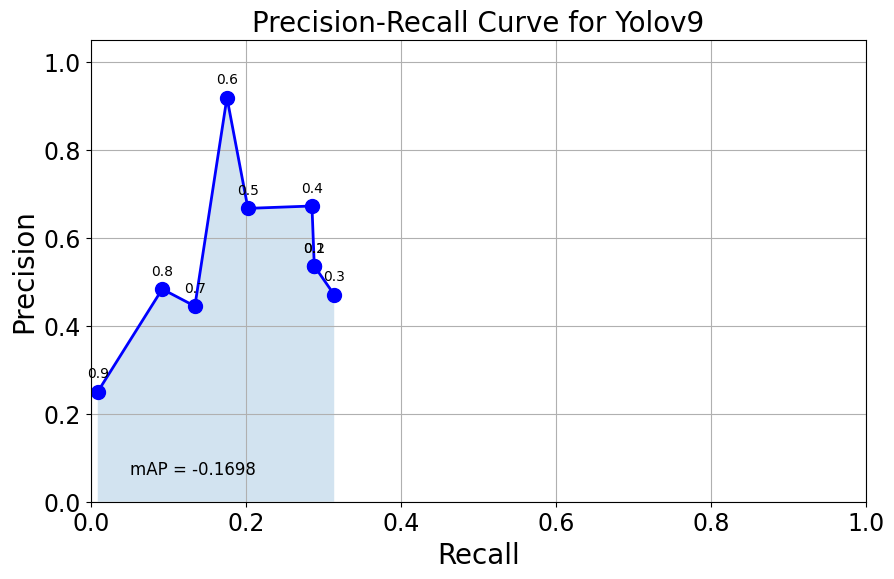

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the validation runs
confidences = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
precisions = [0.5357, 0.5357, 0.4704, 0.6721, 0.6667, 0.9185, 0.4444, 0.4833, 0.2500]
recalls = [0.2884, 0.2884, 0.3141, 0.2854, 0.2028, 0.1757, 0.1343, 0.0922, 0.0090]

# Sort the data by recall
sorted_indices = np.argsort(recalls)[::-1]
recalls_sorted = np.array(recalls)[sorted_indices]
precisions_sorted = np.array(precisions)[sorted_indices]

# Compute the mean average precision (mAP)
mAP = np.trapz(precisions_sorted, recalls_sorted)

# Create the precision-recall curve
plt.figure(figsize=(10, 6))
plt.plot(recalls_sorted, precisions_sorted,'b-', linewidth=2 , marker='o',markersize=10)
plt.fill_between(recalls_sorted, precisions_sorted, alpha=0.2)
plt.xlabel('Recall', fontsize=20)
plt.ylabel('Precision', fontsize=20)
plt.title('Precision-Recall Curve for Yolov9', fontsize=20)

# Set the font size for x-axis ticks
plt.tick_params(axis='x', labelsize=17)
plt.tick_params(axis='y', labelsize=17)
# Add confidence threshold annotations
for conf, prec, rec in zip(confidences, precisions, recalls):
    plt.annotate(f'{conf}', (rec, prec), textcoords="offset points", xytext=(0,10), ha='center')

# Add mAP to the plot
plt.text(0.05, 0.05, f'mAP = {mAP:.4f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='bottom')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.grid(True)
plt.show()

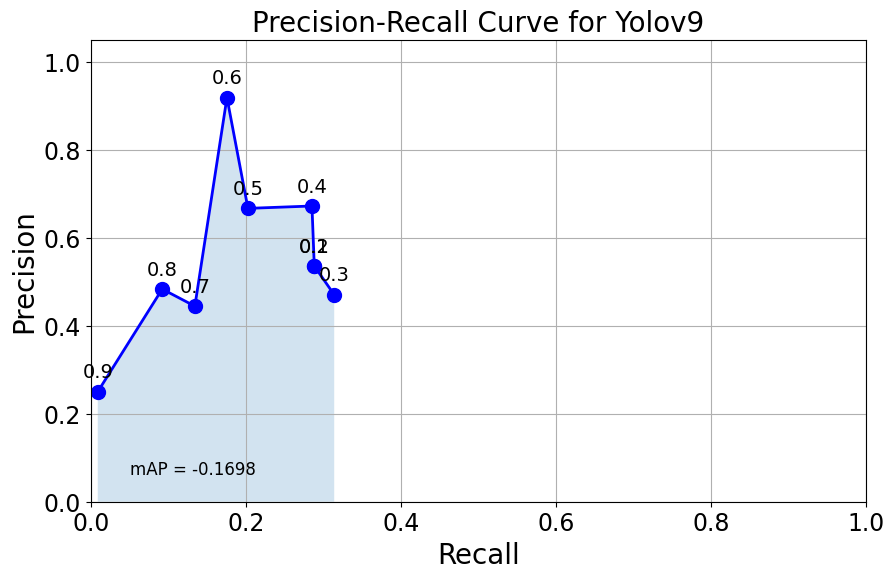

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the validation runs
confidences = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
precisions = [0.5357, 0.5357, 0.4704, 0.6721, 0.6667, 0.9185, 0.4444, 0.4833, 0.2500]
recalls = [0.2884, 0.2884, 0.3141, 0.2854, 0.2028, 0.1757, 0.1343, 0.0922, 0.0090]

# Sort the data by recall
sorted_indices = np.argsort(recalls)[::-1]
recalls_sorted = np.array(recalls)[sorted_indices]
precisions_sorted = np.array(precisions)[sorted_indices]

# Compute the mean average precision (mAP)
mAP = np.trapz(precisions_sorted, recalls_sorted)

# Create the precision-recall curve
plt.figure(figsize=(10, 6))
plt.plot(recalls_sorted, precisions_sorted, 'b-', linewidth=2, marker='o', markersize=10)
plt.fill_between(recalls_sorted, precisions_sorted, alpha=0.2)
plt.xlabel('Recall', fontsize=20)
plt.ylabel('Precision', fontsize=20)
plt.title('Precision-Recall Curve for Yolov9', fontsize=20)

# Set the font size for x-axis and y-axis ticks
plt.tick_params(axis='x', labelsize=17)
plt.tick_params(axis='y', labelsize=17)

# Add confidence threshold annotations with increased font size
for conf, prec, rec in zip(confidences, precisions, recalls):
    plt.annotate(f'{conf}', (rec, prec), textcoords="offset points", xytext=(0,10), ha='center', fontsize=14)

# Add mAP to the plot
plt.text(0.05, 0.05, f'mAP = {mAP:.4f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='bottom')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.grid(True)
plt.show()


## Results

In [ ]:
from IPython.display import Image


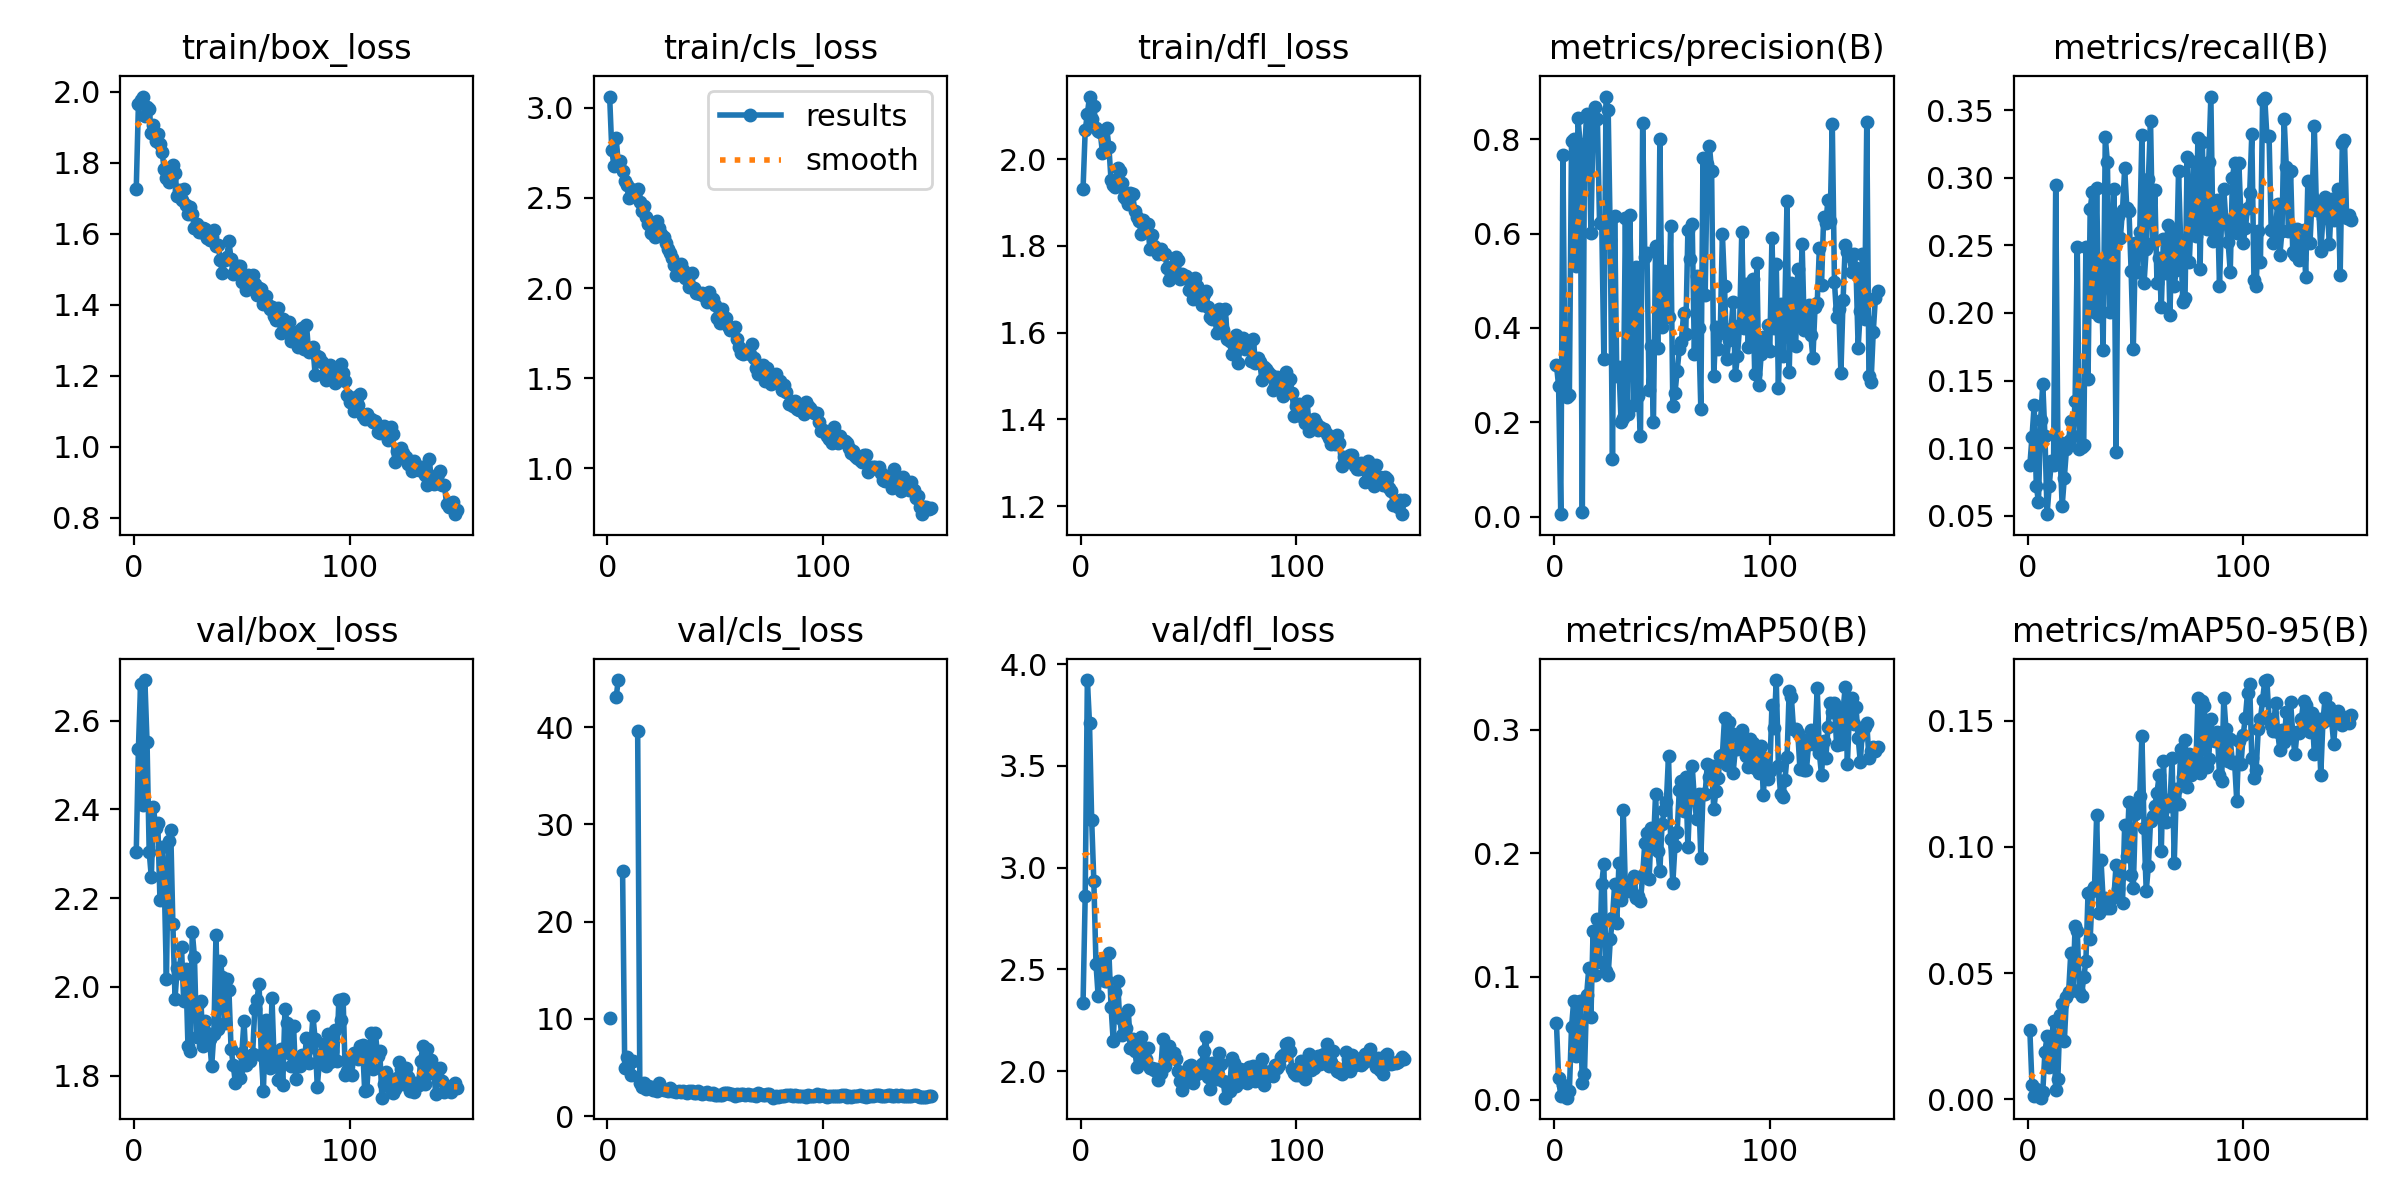

In [ ]:
Image(filename=f"/content/runs/detect/train2/results.png", width=1000)

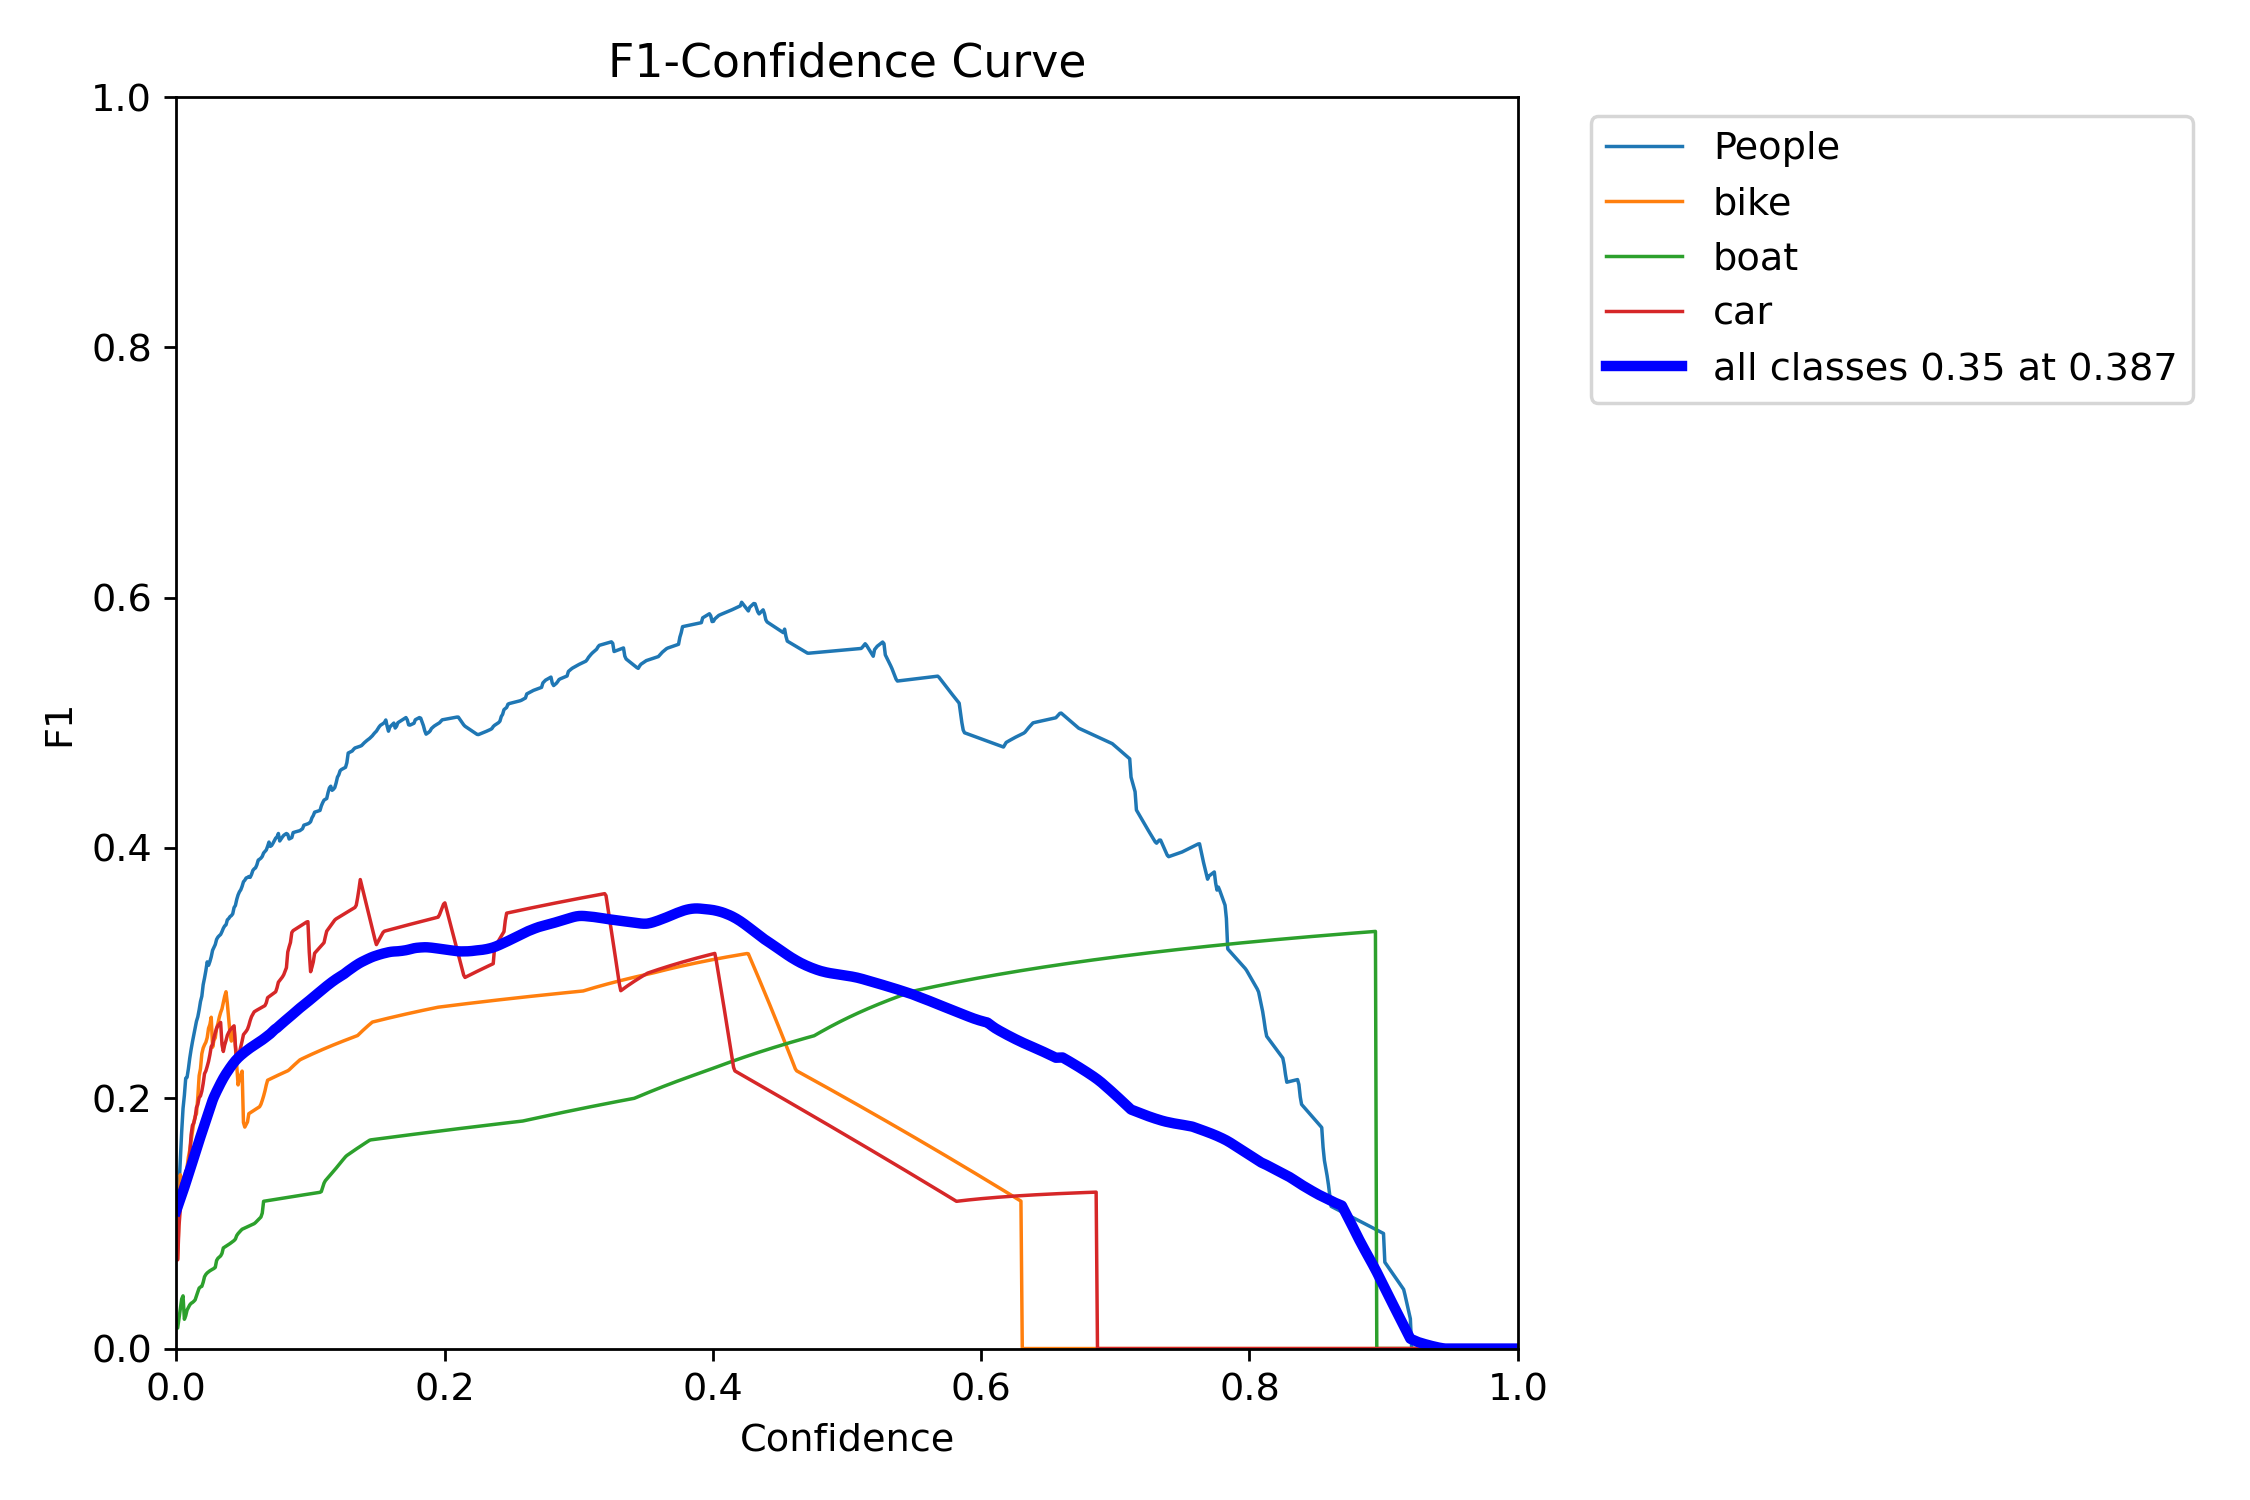

In [ ]:
Image(filename=f"/content/runs/detect/train2/F1_curve.png", width=1000)

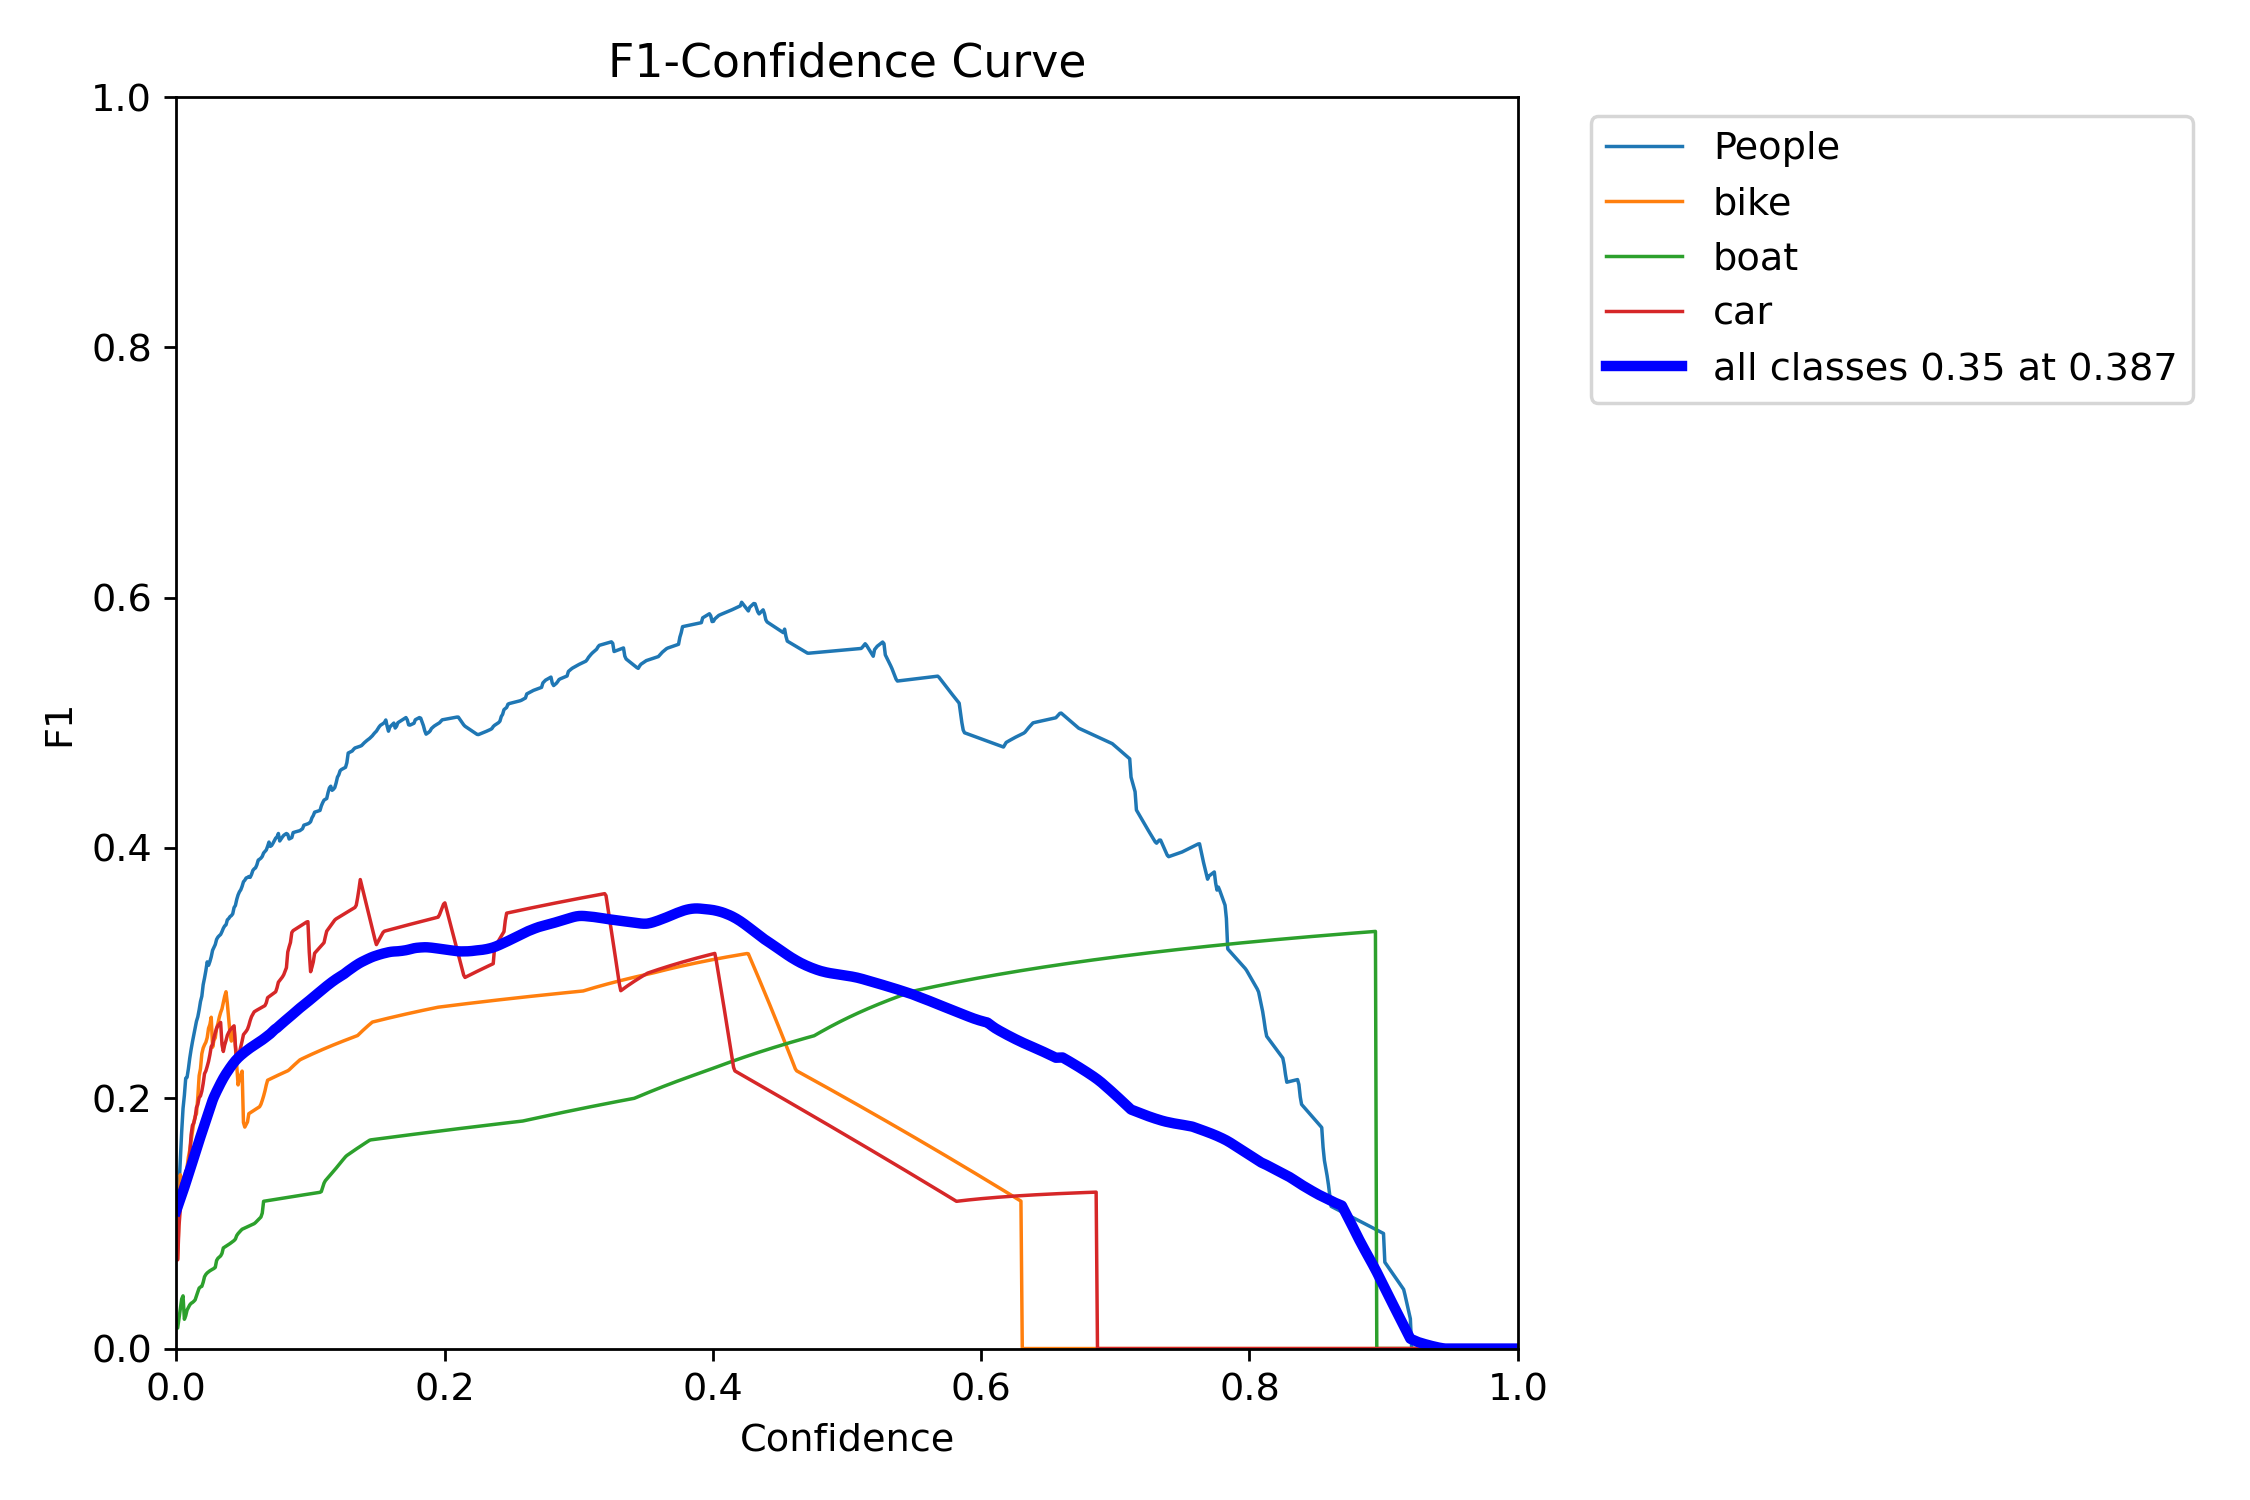

In [ ]:
Image(filename=f"/content/runs/detect/train2/F1_curve.png", width=1000)

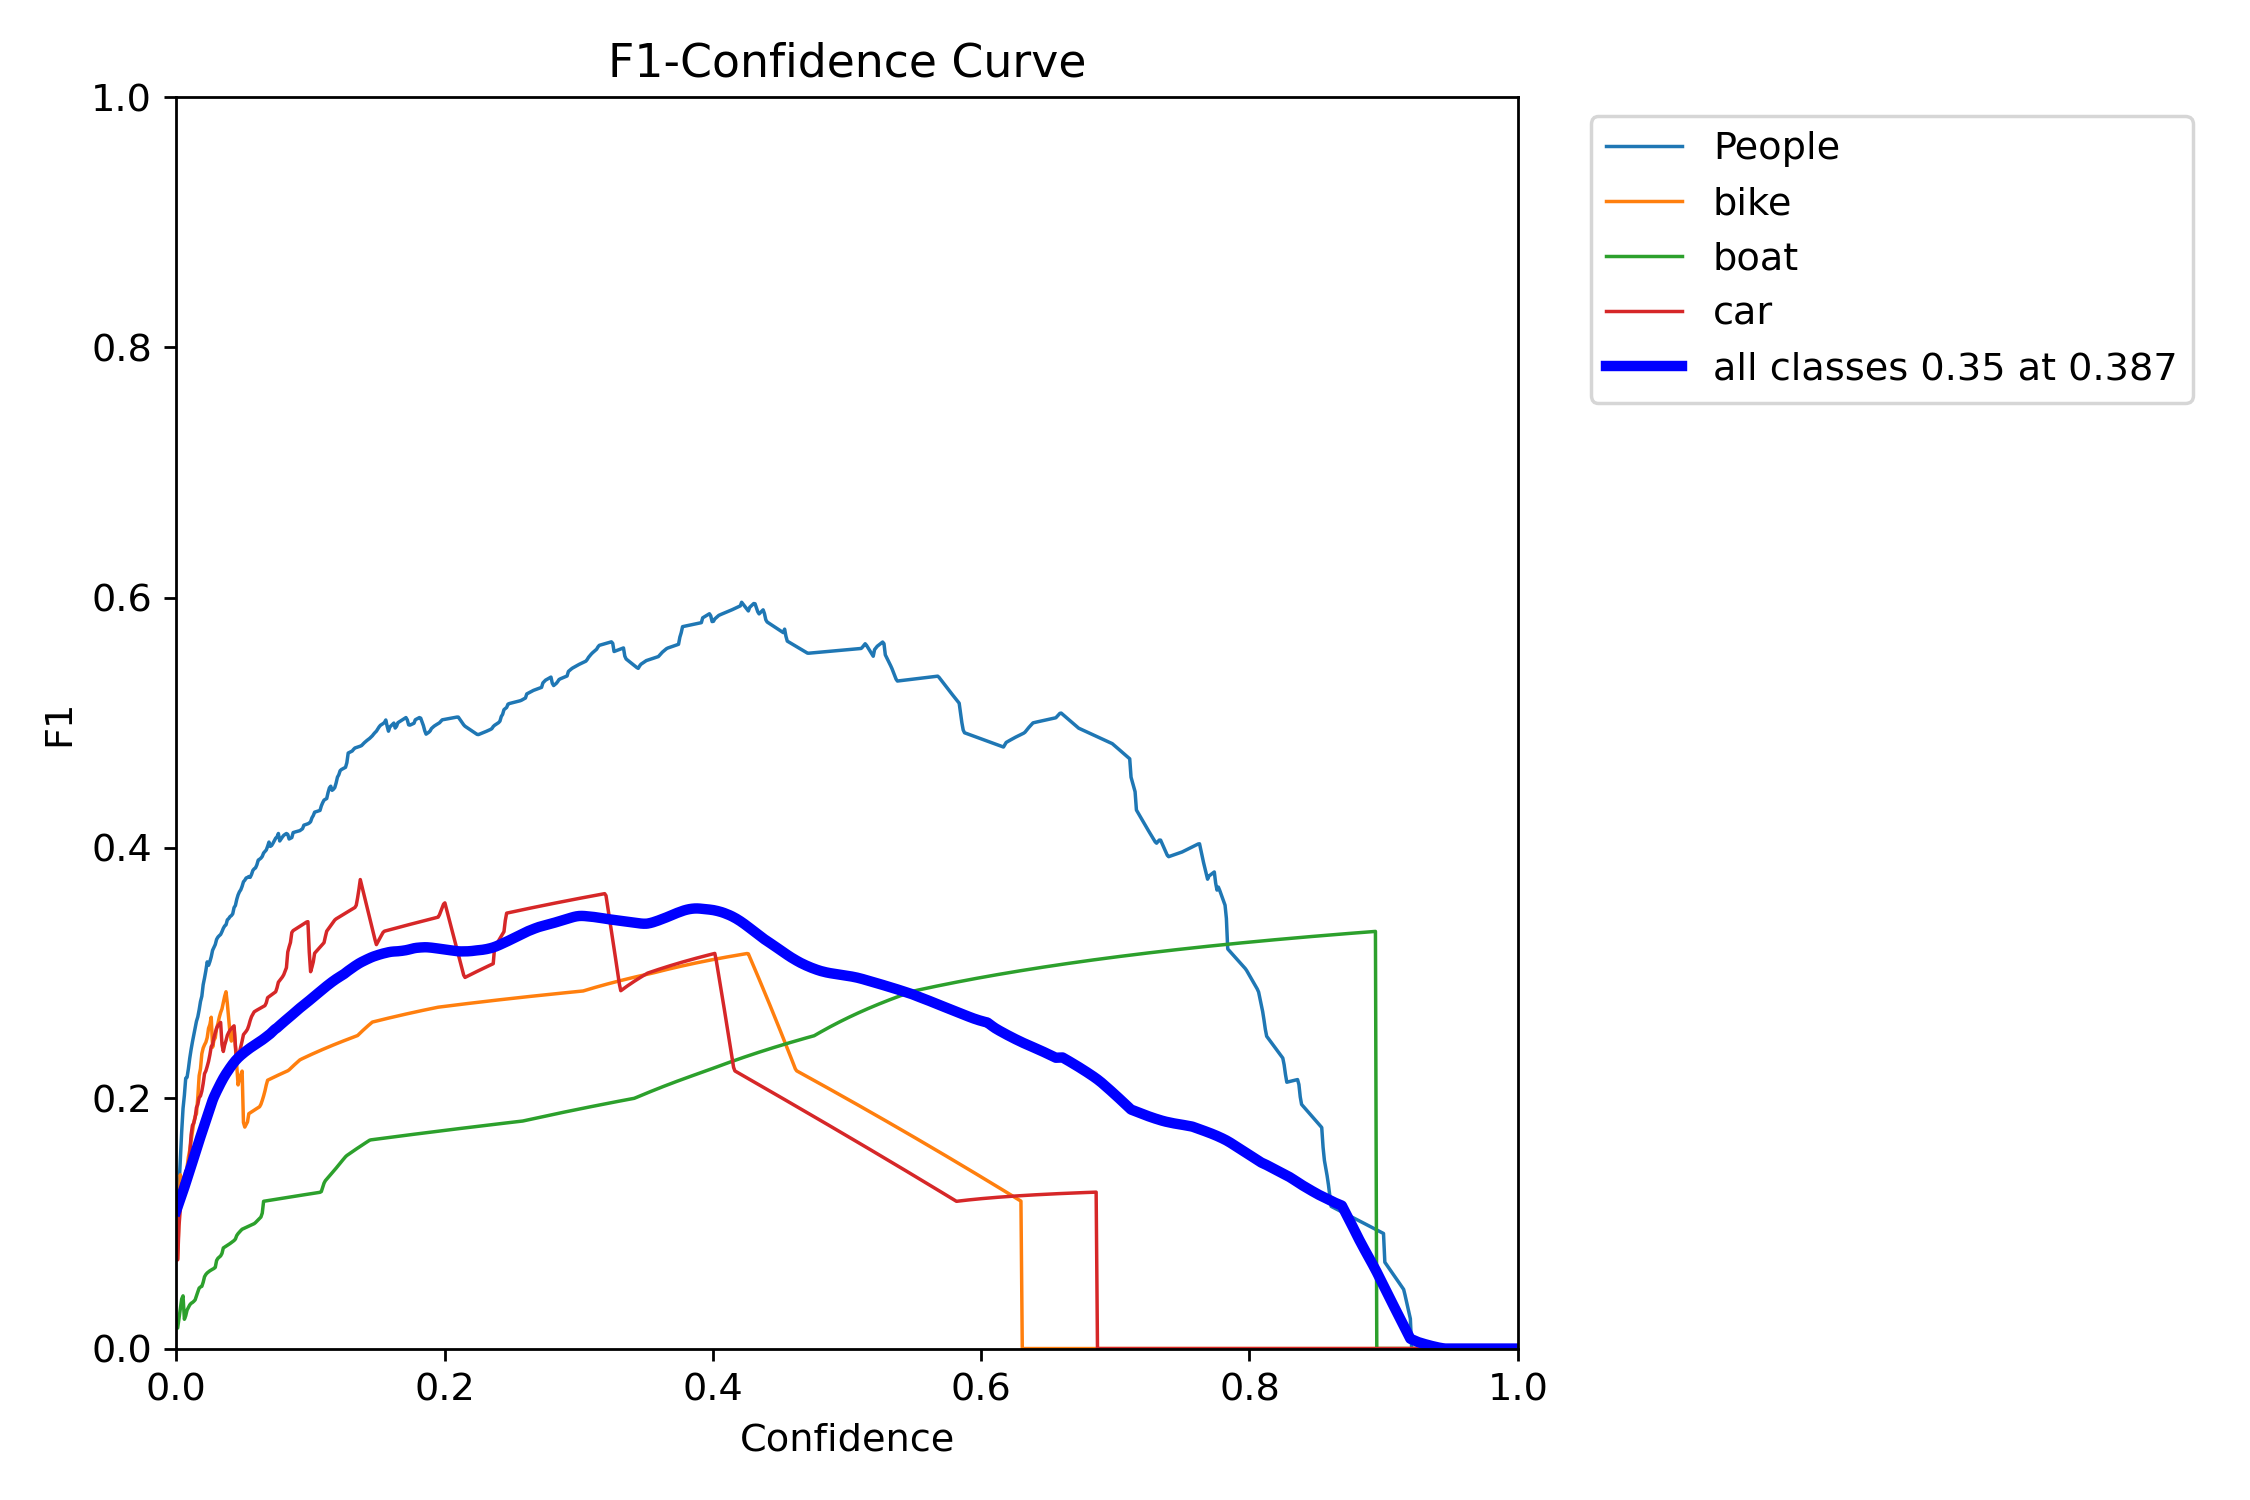

In [ ]:
Image(filename=f"/content/runs/detect/train2/F1_curve.png", width=1000)

## Running it on Yolov8 model :


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="7ZYtFs73KjjycuAgecED")
project = rf.workspace("jaswanth-zzdct").project("flood_affected_people_india")
version = project.version(2)
dataset = version.download("yolov8")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.4 MB/s eta 0:00:00
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
      Successfully uninstalled chardet-5.2.0
loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics==8.0.196`, to intall it `pip install ultralytics==8.0.196`.



Extracting Dataset Version Zip to Flood_affected_people_india-2 in yolov8:: 100%|██████████| 588/588 [00:00<00:00, 7012.01it/s]


In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 793.6/793.6 kB 12.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-

In [ ]:
from ultralytics import YOLO

# Initialize the YOLO model
model = YOLO("yolov8n.pt")

# Display model information (optional)
model.info()

# Train the model on the COCO8 example dataset for 100 epochs
#results = model.train(data="/content/Flood_affected_people_india-2/data.yaml", epochs=100, imgsz=640,batch=8)



100%|██████████| 6.23M/6.23M [00:00<00:00, 244MB/s]


YOLOv8n summary: 225 layers, 3157200 parameters, 0 gradients, 8.9 GFLOPs


(225, 3157200, 0, 8.8575488)

In [ ]:



# Train the model on the Custom Flood dataset  example dataset for 100 epochs.
results = model.train(data="/content/Flood_affected_people_india-2/data.yaml", epochs=150, imgsz=640,batch=8)

Ultralytics YOLOv8.2.45 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Flood_affected_people_india-2/data.yaml, epochs=150, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True,

100%|██████████| 755k/755k [00:00<00:00, 84.6MB/s]


Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)


AMP: checks passed ✅


train: Scanning /content/Flood_affected_people_india-2/train/labels... 252 images, 45 backgrounds, 0 corrupt: 100%|██████████| 252/252 [00:00<00:00, 599.41it/s]

train: New cache created: /content/Flood_affected_people_india-2/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 12, len(boxes) = 1114. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/Flood_affected_people_india-2/valid/labels... 24 images, 5 backgrounds, 0 corrupt: 100%|██████████| 24/24 [00:00<00:00, 253.94it/s]

val: New cache created: /content/Flood_affected_people_india-2/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 4, len(boxes) = 119. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150       1.4G      1.689      3.176      1.774         14        640: 100%|██████████| 32/32 [00:11<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.33it/s]

                   all         24        119     0.0358      0.579      0.104     0.0474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150      1.22G       1.78      2.562      1.811         53        640: 100%|██████████| 32/32 [00:06<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.10it/s]

                   all         24        119      0.874     0.0979      0.115     0.0436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150      1.22G      1.712      2.521      1.807         16        640: 100%|██████████| 32/32 [00:07<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.30it/s]

                   all         24        119      0.808     0.0964     0.0476     0.0165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/150      1.22G      1.795      2.494      1.911         20        640: 100%|██████████| 32/32 [00:05<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.21it/s]

                   all         24        119      0.853      0.114      0.107     0.0527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/150      1.22G      1.716      2.469      1.843         23        640: 100%|██████████| 32/32 [00:09<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.85it/s]

                   all         24        119      0.871     0.0813     0.0854     0.0392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/150      1.22G      1.713       2.46      1.885         33        640: 100%|██████████| 32/32 [00:05<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.79it/s]

                   all         24        119      0.662      0.164      0.127     0.0574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/150      1.23G      1.739      2.381      1.811         16        640: 100%|██████████| 32/32 [00:07<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.19it/s]

                   all         24        119       0.37      0.162      0.152     0.0563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/150      1.22G      1.688      2.361      1.815         20        640: 100%|██████████| 32/32 [00:05<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.84it/s]

                   all         24        119      0.643      0.261      0.183     0.0843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/150      1.22G      1.691      2.306      1.816         36        640: 100%|██████████| 32/32 [00:06<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.03it/s]

                   all         24        119      0.843     0.0849      0.105      0.041



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/150      1.22G      1.665      2.282        1.8         32        640: 100%|██████████| 32/32 [00:06<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.50it/s]

                   all         24        119      0.878      0.139      0.132     0.0652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/150      1.22G       1.68      2.317      1.806         44        640: 100%|██████████| 32/32 [00:05<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.15it/s]

                   all         24        119      0.232      0.239       0.18     0.0965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/150      1.23G      1.661      2.222      1.795         31        640: 100%|██████████| 32/32 [00:08<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.14it/s]

                   all         24        119      0.664      0.173      0.156     0.0683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/150      1.22G      1.621      2.208      1.761         46        640: 100%|██████████| 32/32 [00:05<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.72it/s]

                   all         24        119      0.223      0.319      0.202     0.0803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/150      1.24G      1.571      2.191      1.713         23        640: 100%|██████████| 32/32 [00:08<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.47it/s]

                   all         24        119      0.452      0.149      0.192     0.0903



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/150      1.22G      1.554      2.112      1.723         40        640: 100%|██████████| 32/32 [00:05<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.33it/s]

                   all         24        119      0.415      0.226      0.187     0.0866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/150      1.24G      1.547      2.085      1.713         23        640: 100%|██████████| 32/32 [00:06<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.91it/s]


                   all         24        119      0.762      0.182      0.241      0.111

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/150      1.24G      1.542       2.14      1.721         27        640: 100%|██████████| 32/32 [00:06<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.27it/s]

                   all         24        119      0.442      0.249      0.256      0.114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/150      1.22G      1.573      2.081      1.722         51        640: 100%|██████████| 32/32 [00:05<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.20it/s]

                   all         24        119      0.187      0.315      0.258      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/150      1.23G       1.54      2.015      1.686         24        640: 100%|██████████| 32/32 [00:08<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.39it/s]

                   all         24        119      0.633      0.295      0.253       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/150      1.24G       1.52      1.986       1.68         15        640: 100%|██████████| 32/32 [00:05<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.73it/s]

                   all         24        119       0.34      0.201      0.239      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/150      1.22G      1.508      1.958      1.662         42        640: 100%|██████████| 32/32 [00:07<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.61it/s]

                   all         24        119      0.241      0.288       0.23      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/150      1.23G      1.516      1.984      1.683         32        640: 100%|██████████| 32/32 [00:05<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.69it/s]

                   all         24        119      0.472      0.289      0.283      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/150      1.22G      1.568      2.011      1.706         36        640: 100%|██████████| 32/32 [00:05<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.67it/s]

                   all         24        119       0.27      0.276      0.271      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/150      1.23G      1.527      1.968      1.713         25        640: 100%|██████████| 32/32 [00:06<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.66it/s]

                   all         24        119      0.516      0.263      0.272      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/150      1.23G      1.533       1.93      1.682         35        640: 100%|██████████| 32/32 [00:05<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.68it/s]


                   all         24        119      0.602      0.223      0.296      0.132

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/150      1.24G      1.528      1.916      1.649         14        640: 100%|██████████| 32/32 [00:08<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.70it/s]

                   all         24        119      0.605      0.268       0.34      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/150      1.23G      1.489      1.854      1.654         51        640: 100%|██████████| 32/32 [00:05<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.91it/s]

                   all         24        119       0.29      0.303      0.259      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/150      1.24G      1.456       1.79      1.605         37        640: 100%|██████████| 32/32 [00:07<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.77it/s]

                   all         24        119      0.532      0.287      0.293      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/150      1.22G       1.47      1.833      1.637         36        640: 100%|██████████| 32/32 [00:05<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.29it/s]

                   all         24        119      0.306      0.264      0.237      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/150      1.23G      1.432       1.79      1.614         28        640: 100%|██████████| 32/32 [00:06<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.50it/s]

                   all         24        119      0.414      0.385      0.326       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/150      1.24G      1.479      1.762      1.644         28        640: 100%|██████████| 32/32 [00:06<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.13it/s]

                   all         24        119      0.333      0.453      0.327      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/150      1.22G      1.441      1.705       1.57         41        640: 100%|██████████| 32/32 [00:05<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.98it/s]

                   all         24        119      0.386       0.36       0.33      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/150      1.22G      1.408      1.662      1.558         18        640: 100%|██████████| 32/32 [00:08<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.53it/s]

                   all         24        119      0.489      0.306      0.332      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/150      1.24G      1.423       1.71      1.582         24        640: 100%|██████████| 32/32 [00:05<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.43it/s]

                   all         24        119      0.536      0.277      0.321      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/150      1.23G      1.448      1.729      1.599         42        640: 100%|██████████| 32/32 [00:07<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.74it/s]


                   all         24        119      0.416      0.307      0.316      0.177

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/150      1.23G       1.38      1.662      1.537         14        640: 100%|██████████| 32/32 [00:05<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.38it/s]

                   all         24        119      0.407      0.377      0.331      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/150      1.24G      1.427      1.667      1.557         48        640: 100%|██████████| 32/32 [00:06<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.40it/s]


                   all         24        119      0.323       0.35      0.311      0.152

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/150      1.24G      1.387      1.619      1.545         38        640: 100%|██████████| 32/32 [00:07<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.08it/s]

                   all         24        119      0.515      0.305      0.334      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/150      1.24G      1.382      1.666      1.545         31        640: 100%|██████████| 32/32 [00:05<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.88it/s]

                   all         24        119        0.4      0.347      0.271      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/150      1.22G      1.348      1.579      1.533         14        640: 100%|██████████| 32/32 [00:09<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.40it/s]

                   all         24        119      0.413      0.358      0.309      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/150      1.22G      1.295      1.532      1.485         40        640: 100%|██████████| 32/32 [00:05<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.17it/s]


                   all         24        119      0.407      0.345        0.3      0.148

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/150      1.22G      1.326      1.539      1.502         34        640: 100%|██████████| 32/32 [00:06<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.51it/s]

                   all         24        119       0.49      0.418      0.352      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/150      1.24G       1.32      1.499       1.52         26        640: 100%|██████████| 32/32 [00:07<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.66it/s]

                   all         24        119      0.499      0.367      0.332      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/150      1.22G      1.319      1.547      1.507         32        640: 100%|██████████| 32/32 [00:05<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.81it/s]

                   all         24        119      0.348       0.43      0.287      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/150      1.24G      1.338      1.517      1.535         28        640: 100%|██████████| 32/32 [00:08<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.31it/s]

                   all         24        119      0.387      0.286      0.258      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/150      1.24G      1.311      1.518      1.518         38        640: 100%|██████████| 32/32 [00:05<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.18it/s]

                   all         24        119      0.469      0.425      0.324      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/150      1.23G      1.323      1.546      1.529         15        640: 100%|██████████| 32/32 [00:07<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.60it/s]

                   all         24        119      0.338      0.304      0.269      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/150      1.24G      1.316      1.491      1.497         24        640: 100%|██████████| 32/32 [00:05<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.87it/s]

                   all         24        119      0.401      0.275       0.28      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/150      1.22G      1.318      1.463      1.479         22        640: 100%|██████████| 32/32 [00:06<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.24it/s]

                   all         24        119      0.368      0.282      0.264       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/150      1.24G      1.304      1.483      1.479         51        640: 100%|██████████| 32/32 [00:06<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.11it/s]

                   all         24        119      0.354      0.334       0.28      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/150      1.24G      1.308       1.44      1.477         13        640: 100%|██████████| 32/32 [00:05<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.84it/s]

                   all         24        119       0.38      0.333      0.287      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/150      1.23G      1.301      1.457      1.486         32        640: 100%|██████████| 32/32 [00:07<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.56it/s]


                   all         24        119      0.453      0.279      0.272      0.138

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/150      1.24G      1.291      1.483      1.504         43        640: 100%|██████████| 32/32 [00:05<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.46it/s]

                   all         24        119      0.569      0.231      0.269      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/150      1.23G      1.265      1.393      1.457         19        640: 100%|██████████| 32/32 [00:08<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.65it/s]

                   all         24        119      0.658      0.244      0.325      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/150      1.24G      1.288      1.409      1.463         33        640: 100%|██████████| 32/32 [00:07<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.66it/s]

                   all         24        119      0.445      0.277      0.252      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/150      1.22G      1.287      1.422      1.479         22        640: 100%|██████████| 32/32 [00:10<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.00it/s]

                   all         24        119      0.435      0.248      0.283      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/150      1.23G      1.247      1.367      1.459         35        640: 100%|██████████| 32/32 [00:05<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.99it/s]

                   all         24        119      0.375      0.287      0.271      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/150      1.23G       1.27      1.367      1.471         24        640: 100%|██████████| 32/32 [00:07<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.68it/s]

                   all         24        119       0.32      0.342      0.275      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/150      1.22G      1.275      1.366      1.453         45        640: 100%|██████████| 32/32 [00:05<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.96it/s]

                   all         24        119      0.374       0.36      0.334      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/150      1.23G      1.248      1.393      1.439         35        640: 100%|██████████| 32/32 [00:06<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.33it/s]

                   all         24        119       0.37      0.331      0.276      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/150      1.24G      1.245      1.322      1.423         41        640: 100%|██████████| 32/32 [00:07<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.14it/s]

                   all         24        119       0.41        0.3      0.316      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/150      1.22G      1.233      1.324       1.44         52        640: 100%|██████████| 32/32 [00:05<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.08it/s]

                   all         24        119      0.464      0.314      0.337      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/150      1.24G       1.22      1.313      1.418         58        640: 100%|██████████| 32/32 [00:08<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.59it/s]

                   all         24        119      0.413      0.317      0.273       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/150      1.22G      1.243      1.334      1.462         16        640: 100%|██████████| 32/32 [00:05<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.35it/s]

                   all         24        119      0.368      0.394      0.337      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/150      1.23G      1.212      1.308      1.422         28        640: 100%|██████████| 32/32 [00:07<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.99it/s]

                   all         24        119      0.523      0.415      0.408      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/150      1.24G      1.222      1.309      1.424         38        640: 100%|██████████| 32/32 [00:05<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.05it/s]

                   all         24        119      0.497      0.422      0.381      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/150      1.22G      1.221      1.343      1.446         23        640: 100%|██████████| 32/32 [00:06<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.11it/s]

                   all         24        119      0.348      0.352      0.292      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/150      1.22G      1.166       1.26      1.396         22        640: 100%|██████████| 32/32 [00:07<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.76it/s]

                   all         24        119      0.415       0.31      0.327       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/150      1.22G      1.201      1.257      1.401         19        640: 100%|██████████| 32/32 [00:05<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.39it/s]

                   all         24        119      0.395       0.42      0.334      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/150      1.24G      1.215      1.229       1.38         32        640: 100%|██████████| 32/32 [00:08<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.63it/s]

                   all         24        119      0.445      0.384      0.351      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/150      1.22G      1.179      1.211      1.371         28        640: 100%|██████████| 32/32 [00:05<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.95it/s]

                   all         24        119      0.607      0.326      0.359      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/150      1.24G       1.21      1.223      1.408         32        640: 100%|██████████| 32/32 [00:07<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.02it/s]

                   all         24        119      0.434      0.336      0.353      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/150      1.23G      1.135      1.166      1.346         46        640: 100%|██████████| 32/32 [00:06<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.56it/s]

                   all         24        119      0.454      0.291       0.32      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/150      1.22G      1.175      1.218      1.391         59        640: 100%|██████████| 32/32 [00:05<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.58it/s]

                   all         24        119      0.415      0.342      0.339      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/150      1.23G      1.141      1.203      1.383         27        640: 100%|██████████| 32/32 [00:07<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.25it/s]

                   all         24        119      0.605      0.327       0.39      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/150      1.24G      1.133       1.14      1.368         27        640: 100%|██████████| 32/32 [00:05<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.53it/s]

                   all         24        119      0.554      0.319      0.357      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/150      1.23G      1.161       1.19      1.383         52        640: 100%|██████████| 32/32 [00:08<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.86it/s]

                   all         24        119      0.327       0.27      0.284      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/150      1.22G      1.187       1.22      1.383         24        640: 100%|██████████| 32/32 [00:05<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.72it/s]

                   all         24        119      0.468      0.295      0.321      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/150      1.22G      1.117      1.148      1.348         17        640: 100%|██████████| 32/32 [00:07<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.33it/s]

                   all         24        119      0.441      0.334      0.295      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/150      1.23G      1.181      1.155      1.381         25        640: 100%|██████████| 32/32 [00:06<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.55it/s]

                   all         24        119      0.495      0.341      0.337      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/150      1.23G       1.14      1.143      1.351         55        640: 100%|██████████| 32/32 [00:05<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.35it/s]

                   all         24        119      0.434      0.328      0.306      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/150      1.22G      1.164      1.185      1.386         32        640: 100%|██████████| 32/32 [00:09<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.28it/s]

                   all         24        119      0.379      0.368      0.299      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/150      1.22G      1.109      1.134      1.336         43        640: 100%|██████████| 32/32 [00:05<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.87it/s]

                   all         24        119      0.492      0.291      0.342      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/150      1.22G      1.063      1.085      1.316         31        640: 100%|██████████| 32/32 [00:07<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]

                   all         24        119      0.574      0.371      0.404      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/150      1.24G      1.087      1.093      1.324         37        640: 100%|██████████| 32/32 [00:06<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.73it/s]

                   all         24        119      0.388      0.434      0.354      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/150      1.22G      1.123      1.076      1.333         30        640: 100%|██████████| 32/32 [00:05<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.79it/s]

                   all         24        119      0.473      0.295      0.316      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/150      1.22G      1.106      1.093      1.331         28        640: 100%|██████████| 32/32 [00:07<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.71it/s]

                   all         24        119      0.427      0.327      0.333      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/150      1.24G      1.087       1.09      1.334         24        640: 100%|██████████| 32/32 [00:05<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.26it/s]

                   all         24        119      0.482      0.327      0.358      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/150      1.23G      1.085      1.064       1.31         33        640: 100%|██████████| 32/32 [00:07<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.36it/s]

                   all         24        119      0.582      0.369      0.396       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/150      1.22G      1.068      1.058      1.303         11        640: 100%|██████████| 32/32 [00:05<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.64it/s]

                   all         24        119      0.524      0.363      0.366      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/150      1.22G      1.076      1.057      1.302         46        640: 100%|██████████| 32/32 [00:06<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.54it/s]

                   all         24        119      0.532        0.4      0.375      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/150      1.24G      1.102      1.115      1.328         15        640: 100%|██████████| 32/32 [00:06<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.64it/s]

                   all         24        119      0.526      0.383      0.363      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/150      1.22G      1.059      1.074      1.316         34        640: 100%|██████████| 32/32 [00:05<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.78it/s]

                   all         24        119      0.564      0.349      0.385      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/150      1.22G      1.061      1.061      1.294         38        640: 100%|██████████| 32/32 [00:08<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.83it/s]

                   all         24        119      0.565      0.426      0.435      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/150      1.22G      1.093      1.086      1.334         32        640: 100%|██████████| 32/32 [00:05<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.96it/s]

                   all         24        119      0.568      0.471      0.422        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/150      1.24G      1.078      1.061       1.31         29        640: 100%|██████████| 32/32 [00:07<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.53it/s]

                   all         24        119      0.574      0.437      0.365      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/150      1.22G      1.031      1.034      1.286         24        640: 100%|██████████| 32/32 [00:05<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.34it/s]

                   all         24        119      0.487      0.382      0.366      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/150      1.24G       1.06      1.035      1.293         52        640: 100%|██████████| 32/32 [00:06<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.77it/s]

                   all         24        119      0.471      0.479      0.442      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/150      1.22G     0.9996     0.9664      1.235         32        640: 100%|██████████| 32/32 [00:07<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.91it/s]

                   all         24        119      0.605       0.43      0.446      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/150      1.23G      1.002     0.9835      1.268         30        640: 100%|██████████| 32/32 [00:05<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.90it/s]

                   all         24        119      0.539      0.454      0.392      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/150      1.23G      1.021      1.012      1.279         22        640: 100%|██████████| 32/32 [00:08<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.89it/s]

                   all         24        119       0.48      0.387      0.365      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/150      1.24G      1.015     0.9939      1.268         12        640: 100%|██████████| 32/32 [00:05<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.17it/s]

                   all         24        119       0.62      0.311      0.357        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/150      1.23G       1.03     0.9724      1.267         28        640: 100%|██████████| 32/32 [00:07<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.94it/s]

                   all         24        119      0.484      0.357      0.359      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/150      1.24G      1.032      0.977       1.26         28        640: 100%|██████████| 32/32 [00:05<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.00it/s]

                   all         24        119      0.603      0.317      0.364      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/150      1.23G      1.058      1.048        1.3         59        640: 100%|██████████| 32/32 [00:06<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.49it/s]

                   all         24        119      0.317      0.399      0.319      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/150      1.22G     0.9801     0.9568      1.229         29        640: 100%|██████████| 32/32 [00:07<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.45it/s]

                   all         24        119      0.299      0.373      0.301      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/150      1.22G     0.9895     0.9539      1.249         34        640: 100%|██████████| 32/32 [00:05<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.22it/s]

                   all         24        119      0.439       0.28       0.32      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/150      1.23G      1.009     0.9789      1.266         17        640: 100%|██████████| 32/32 [00:08<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.81it/s]

                   all         24        119      0.443      0.354      0.335      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/150      1.24G      1.004     0.9649      1.273         43        640: 100%|██████████| 32/32 [00:05<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.05it/s]

                   all         24        119      0.416      0.356       0.33      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/150      1.22G     0.9978      0.965      1.253         15        640: 100%|██████████| 32/32 [00:07<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.78it/s]

                   all         24        119      0.592      0.291      0.326      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/150      1.24G     0.9833     0.9359      1.254         30        640: 100%|██████████| 32/32 [00:06<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.23it/s]

                   all         24        119      0.573      0.294      0.328      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/150      1.22G      1.007     0.9502      1.251         33        640: 100%|██████████| 32/32 [00:05<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.47it/s]

                   all         24        119      0.441      0.357      0.337      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/150      1.22G     0.9563     0.9281      1.246         28        640: 100%|██████████| 32/32 [00:07<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.81it/s]

                   all         24        119      0.522       0.31      0.354      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/150      1.24G     0.9476     0.9304      1.234         31        640: 100%|██████████| 32/32 [00:05<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.73it/s]

                   all         24        119      0.568       0.31      0.315      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/150      1.22G     0.9548      0.915      1.215         37        640: 100%|██████████| 32/32 [00:08<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.70it/s]

                   all         24        119      0.495      0.352       0.35      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/150      1.22G     0.9691     0.9178      1.216         24        640: 100%|██████████| 32/32 [00:05<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.37it/s]

                   all         24        119      0.512      0.366      0.343      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/150      1.24G     0.9508     0.8899      1.224         29        640: 100%|██████████| 32/32 [00:07<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.99it/s]

                   all         24        119      0.491      0.346      0.365       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/150      1.22G     0.9249     0.8844      1.204         34        640: 100%|██████████| 32/32 [00:06<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.27it/s]

                   all         24        119      0.344      0.425      0.373      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/150      1.23G     0.9649     0.9274      1.224         23        640: 100%|██████████| 32/32 [00:05<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.02it/s]

                   all         24        119      0.355      0.432      0.376      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/150      1.22G     0.9697     0.9198       1.23         56        640: 100%|██████████| 32/32 [00:07<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.34it/s]

                   all         24        119      0.469      0.431      0.373      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/150      1.22G     0.9176     0.8573      1.196         48        640: 100%|██████████| 32/32 [00:05<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.03it/s]

                   all         24        119      0.523      0.336      0.365       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/150      1.23G     0.9178     0.8622      1.191         53        640: 100%|██████████| 32/32 [00:08<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.03it/s]

                   all         24        119      0.509      0.376      0.355      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/150      1.22G     0.9376     0.8885      1.196         26        640: 100%|██████████| 32/32 [00:05<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.44it/s]

                   all         24        119      0.447      0.356      0.329      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/150      1.22G     0.9432     0.9012      1.195         66        640: 100%|██████████| 32/32 [00:06<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.28it/s]

                   all         24        119      0.384       0.39      0.346      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/150      1.24G     0.9219      0.872      1.213         14        640: 100%|██████████| 32/32 [00:06<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.25it/s]

                   all         24        119      0.503      0.324      0.348      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/150      1.22G     0.9085     0.8638      1.213         20        640: 100%|██████████| 32/32 [00:05<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.93it/s]

                   all         24        119      0.588      0.308      0.346      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/150      1.24G      0.895      0.871      1.186         32        640: 100%|██████████| 32/32 [00:08<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.16it/s]

                   all         24        119      0.594      0.299      0.333      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/150      1.24G     0.9112     0.8446      1.195         21        640: 100%|██████████| 32/32 [00:05<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.32it/s]

                   all         24        119        0.6      0.288      0.342      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/150      1.23G     0.9023     0.8362      1.202         19        640: 100%|██████████| 32/32 [00:07<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.22it/s]

                   all         24        119      0.505      0.322      0.393        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/150      1.24G     0.9154     0.8516      1.206         14        640: 100%|██████████| 32/32 [00:05<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.88it/s]

                   all         24        119      0.561        0.4        0.4      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/150      1.22G     0.9103     0.8587      1.211         33        640: 100%|██████████| 32/32 [00:05<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]

                   all         24        119      0.475       0.34      0.369      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/150      1.24G     0.9108     0.8186      1.171         25        640: 100%|██████████| 32/32 [00:08<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.51it/s]

                   all         24        119      0.568      0.307      0.373      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/150      1.22G     0.9053     0.8963      1.208         35        640: 100%|██████████| 32/32 [00:05<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.08it/s]

                   all         24        119      0.586       0.39       0.41      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/150      1.22G     0.8891     0.8368      1.189         25        640: 100%|██████████| 32/32 [00:08<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.88it/s]

                   all         24        119      0.606      0.383      0.414      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/150      1.23G     0.8854      0.834      1.189         42        640: 100%|██████████| 32/32 [00:05<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.46it/s]

                   all         24        119      0.606      0.388      0.408      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/150      1.23G     0.8669     0.7939      1.173         32        640: 100%|██████████| 32/32 [00:06<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.23it/s]

                   all         24        119      0.571      0.387      0.411      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/150      1.22G     0.9156     0.8272      1.193         22        640: 100%|██████████| 32/32 [00:06<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.98it/s]

                   all         24        119      0.582      0.322      0.385      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/150      1.24G     0.8614      0.811      1.162         37        640: 100%|██████████| 32/32 [00:05<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.08it/s]

                   all         24        119       0.57      0.322      0.374        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/150      1.24G     0.8683     0.8194      1.194         17        640: 100%|██████████| 32/32 [00:08<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.70it/s]

                   all         24        119       0.53      0.322      0.373      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/150      1.22G     0.8876     0.8265      1.175         50        640: 100%|██████████| 32/32 [00:05<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.06it/s]

                   all         24        119      0.539      0.322      0.387      0.203


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/150      1.35G     0.8571     0.8167      1.161         20        640: 100%|██████████| 32/32 [00:10<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.94it/s]

                   all         24        119        0.6       0.31      0.402      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/150      1.22G      0.862     0.7898      1.162         15        640: 100%|██████████| 32/32 [00:05<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.67it/s]

                   all         24        119       0.42      0.416      0.399      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/150      1.22G      0.848     0.7428      1.148         16        640: 100%|██████████| 32/32 [00:07<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.65it/s]

                   all         24        119      0.406      0.441      0.393      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/150      1.22G     0.8298     0.7483      1.154         23        640: 100%|██████████| 32/32 [00:04<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.37it/s]

                   all         24        119      0.425      0.441      0.404      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/150      1.22G     0.7738     0.6946      1.109         20        640: 100%|██████████| 32/32 [00:05<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.85it/s]

                   all         24        119      0.444      0.448      0.401      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/150      1.23G     0.8103     0.7024       1.13         19        640: 100%|██████████| 32/32 [00:07<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.63it/s]

                   all         24        119      0.472      0.428      0.392      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/150      1.22G     0.8243     0.7127      1.143         13        640: 100%|██████████| 32/32 [00:05<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.01it/s]

                   all         24        119      0.499      0.331      0.368      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/150      1.22G     0.8176     0.7249      1.141         18        640: 100%|██████████| 32/32 [00:08<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.59it/s]

                   all         24        119      0.437      0.424      0.384      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/150      1.22G     0.7757     0.7014      1.122         12        640: 100%|██████████| 32/32 [00:05<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.17it/s]

                   all         24        119      0.449      0.433       0.38      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/150      1.23G     0.7909     0.7126      1.136          4        640: 100%|██████████| 32/32 [00:06<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.66it/s]

                   all         24        119      0.603      0.297      0.365       0.19



150 epochs completed in 0.324 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.45 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.80it/s]


                   all         24        119      0.564      0.424      0.433      0.211
                People         17         83      0.477      0.737      0.632      0.368
                  bike          4         16      0.458      0.375      0.424      0.159
                  boat          3          5          1      0.383        0.4      0.161
                   car          7         15       0.32        0.2      0.278      0.155
Speed: 0.2ms preprocess, 4.8ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to runs/detect/train


In [ ]:
from ultralytics import YOLO
from ultralytics.utils.metrics import ConfusionMatrix
import numpy as np

# Assuming you've already trained your model
model = YOLO("/content/runs/detect/train/weights/best.pt")  # Load the best weights from your training

# Run validation on your test set
results = model.val(data="/content/Flood_affected_people_india-2/data.yaml")

# Extract metrics
metrics = results.results_dict

# Print the metrics
print(f"Precision: {metrics['metrics/precision(B)']:.4f}")
print(f"Recall: {metrics['metrics/recall(B)']:.4f}")
print(f"mAP50: {metrics['metrics/mAP50(B)']:.4f}")
print(f"mAP50-95: {metrics['metrics/mAP50-95(B)']:.4f}")

# If you want to calculate precision and recall at different confidence thresholds:
conf_thresholds = np.linspace(0.1, 0.9, 9)
precisions = []
recalls = []

for conf in conf_thresholds:
    results = model.val(data="/content/Flood_affected_people_india-2/data.yaml", conf=conf)
    metrics = results.results_dict
    precisions.append(metrics['metrics/precision(B)'])
    recalls.append(metrics['metrics/recall(B)'])

# Print precision-recall pairs
for conf, prec, rec in zip(conf_thresholds, precisions, recalls):
    print(f"Confidence: {conf:.1f}, Precision: {prec:.4f}, Recall: {rec:.4f}")

Ultralytics YOLOv8.2.45 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006428 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/Flood_affected_people_india-2/valid/labels.cache... 24 images, 5 backgrounds, 0 corrupt: 100%|██████████| 24/24 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 4, len(boxes) = 119. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.12s/it]


                   all         24        119      0.565      0.426      0.433      0.211
                People         17         83       0.48      0.746      0.632      0.368
                  bike          4         16      0.457      0.375       0.42       0.16
                  boat          3          5          1      0.384        0.4      0.161
                   car          7         15      0.322        0.2      0.279      0.154
Speed: 0.3ms preprocess, 52.4ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to runs/detect/val
Precision: 0.5647
Recall: 0.4263
mAP50: 0.4327
mAP50-95: 0.2108
Ultralytics YOLOv8.2.45 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/Flood_affected_people_india-2/valid/labels.cache... 24 images, 5 backgrounds, 0 corrupt: 100%|██████████| 24/24 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 4, len(boxes) = 119. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]


                   all         24        119      0.566      0.426      0.523      0.263
                People         17         83       0.48      0.746      0.643      0.393
                  bike          4         16      0.462      0.375      0.443      0.186
                  boat          3          5          1      0.384        0.7       0.29
                   car          7         15      0.322        0.2      0.305      0.183
Speed: 0.3ms preprocess, 6.0ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to runs/detect/val2
Ultralytics YOLOv8.2.45 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/Flood_affected_people_india-2/valid/labels.cache... 24 images, 5 backgrounds, 0 corrupt: 100%|██████████| 24/24 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 4, len(boxes) = 119. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.47it/s]


                   all         24        119      0.612      0.365      0.516      0.277
                People         17         83      0.475      0.687      0.625      0.387
                  bike          4         16      0.545      0.375      0.469      0.199
                  boat          3          5          1        0.2        0.6        0.3
                   car          7         15      0.429        0.2      0.369      0.223
Speed: 0.4ms preprocess, 10.5ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/val3
Ultralytics YOLOv8.2.45 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/Flood_affected_people_india-2/valid/labels.cache... 24 images, 5 backgrounds, 0 corrupt: 100%|██████████| 24/24 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 4, len(boxes) = 119. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]


                   all         24        119      0.683      0.307      0.517      0.288
                People         17         83      0.552      0.639      0.625      0.395
                  bike          4         16       0.75      0.188      0.477      0.235
                  boat          3          5          1        0.2        0.6        0.3
                   car          7         15      0.429        0.2      0.369      0.223
Speed: 0.3ms preprocess, 5.7ms inference, 0.0ms loss, 6.8ms postprocess per image
Results saved to runs/detect/val4
Ultralytics YOLOv8.2.45 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/Flood_affected_people_india-2/valid/labels.cache... 24 images, 5 backgrounds, 0 corrupt: 100%|██████████| 24/24 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 4, len(boxes) = 119. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.48it/s]


                   all         24        119      0.792      0.269      0.537      0.312
                People         17         83      0.658      0.554      0.615      0.386
                  bike          4         16          1      0.121      0.562      0.341
                  boat          3          5          1        0.2        0.6        0.3
                   car          7         15       0.51        0.2      0.369      0.223
Speed: 0.4ms preprocess, 7.6ms inference, 0.0ms loss, 3.8ms postprocess per image
Results saved to runs/detect/val5
Ultralytics YOLOv8.2.45 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/Flood_affected_people_india-2/valid/labels.cache... 24 images, 5 backgrounds, 0 corrupt: 100%|██████████| 24/24 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 4, len(boxes) = 119. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.39it/s]


                   all         24        119      0.817      0.254      0.548      0.335
                People         17         83      0.667      0.554      0.624        0.4
                  bike          4         16          1     0.0625      0.531      0.372
                  boat          3          5          1        0.2        0.6        0.3
                   car          7         15        0.6        0.2      0.438      0.267
Speed: 0.3ms preprocess, 7.3ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to runs/detect/val6
Ultralytics YOLOv8.2.45 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/Flood_affected_people_india-2/valid/labels.cache... 24 images, 5 backgrounds, 0 corrupt: 100%|██████████| 24/24 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 4, len(boxes) = 119. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.31it/s]


                   all         24        119      0.838      0.233      0.546      0.335
                People         17         83       0.75       0.47      0.613      0.403
                  bike          4         16          1     0.0625      0.531      0.372
                  boat          3          5          1        0.2        0.6        0.3
                   car          7         15        0.6        0.2      0.438      0.267
Speed: 0.3ms preprocess, 5.8ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to runs/detect/val7
Ultralytics YOLOv8.2.45 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/Flood_affected_people_india-2/valid/labels.cache... 24 images, 5 backgrounds, 0 corrupt: 100%|██████████| 24/24 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 4, len(boxes) = 119. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.78it/s]


                   all         24        119       0.85      0.212      0.541      0.337
                People         17         83        0.8      0.386      0.596       0.41
                  bike          4         16          1     0.0625      0.531      0.372
                  boat          3          5          1        0.2        0.6        0.3
                   car          7         15        0.6        0.2      0.438      0.267
Speed: 0.4ms preprocess, 6.7ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to runs/detect/val8
Ultralytics YOLOv8.2.45 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/Flood_affected_people_india-2/valid/labels.cache... 24 images, 5 backgrounds, 0 corrupt: 100%|██████████| 24/24 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 4, len(boxes) = 119. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.37it/s]


                   all         24        119      0.972      0.188      0.579      0.368
                People         17         83      0.889      0.289      0.587      0.432
                  bike          4         16          1     0.0625      0.531      0.372
                  boat          3          5          1        0.2        0.6        0.3
                   car          7         15          1        0.2        0.6      0.369
Speed: 0.6ms preprocess, 5.9ms inference, 0.0ms loss, 2.7ms postprocess per image
Results saved to runs/detect/val9
Ultralytics YOLOv8.2.45 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/Flood_affected_people_india-2/valid/labels.cache... 24 images, 5 backgrounds, 0 corrupt: 100%|██████████| 24/24 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 4, len(boxes) = 119. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.94it/s]


                   all         24        119      0.477     0.0468      0.261      0.179
                People         17         83      0.909       0.12      0.512      0.344
                  bike          4         16          0          0          0          0
                  boat          3          5          0          0          0          0
                   car          7         15          1     0.0667      0.533      0.373
Speed: 0.3ms preprocess, 6.2ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/val10
Confidence: 0.1, Precision: 0.5659, Recall: 0.4263
Confidence: 0.2, Precision: 0.6123, Recall: 0.3654
Confidence: 0.3, Precision: 0.6827, Recall: 0.3065
Confidence: 0.4, Precision: 0.7921, Recall: 0.2687
Confidence: 0.5, Precision: 0.8167, Recall: 0.2542
Confidence: 0.6, Precision: 0.8375, Recall: 0.2331
Confidence: 0.7, Precision: 0.8500, Recall: 0.2120
Confidence: 0.8, Precision: 0.9722, Recall: 0.1879
Confidence: 0.9, Precision: 0.

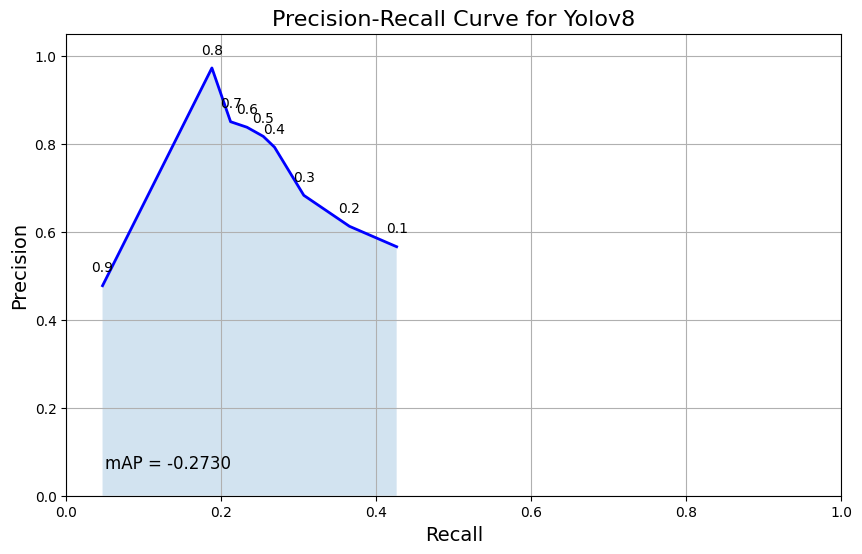

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the validation runs
confidences = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
precisions = [0.5659, 0.6123, 0.6827, 0.7921, 0.8167, 0.8375, 0.8500, 0.9722, 0.4773]
recalls = [0.4263, 0.3654, 0.3065, 0.2687, 0.2542, 0.2331, 0.2120, 0.1879, 0.0468]

# Sort the data by recall
sorted_indices = np.argsort(recalls)[::-1]
recalls_sorted = np.array(recalls)[sorted_indices]
precisions_sorted = np.array(precisions)[sorted_indices]

# Compute the mean average precision (mAP)
mAP = np.trapz(precisions_sorted, recalls_sorted)

# Create the precision-recall curve
plt.figure(figsize=(10, 6))
plt.plot(recalls_sorted, precisions_sorted, 'b-', linewidth=2)
plt.fill_between(recalls_sorted, precisions_sorted, alpha=0.2)
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.title('Precision-Recall Curve for Yolov8', fontsize=16)

# Add confidence threshold annotations
for conf, prec, rec in zip(confidences, precisions, recalls):
    plt.annotate(f'{conf}', (rec, prec), textcoords="offset points", xytext=(0,10), ha='center')

# Add mAP to the plot
plt.text(0.05, 0.05, f'mAP = {mAP:.4f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='bottom')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.grid(True)
plt.show()


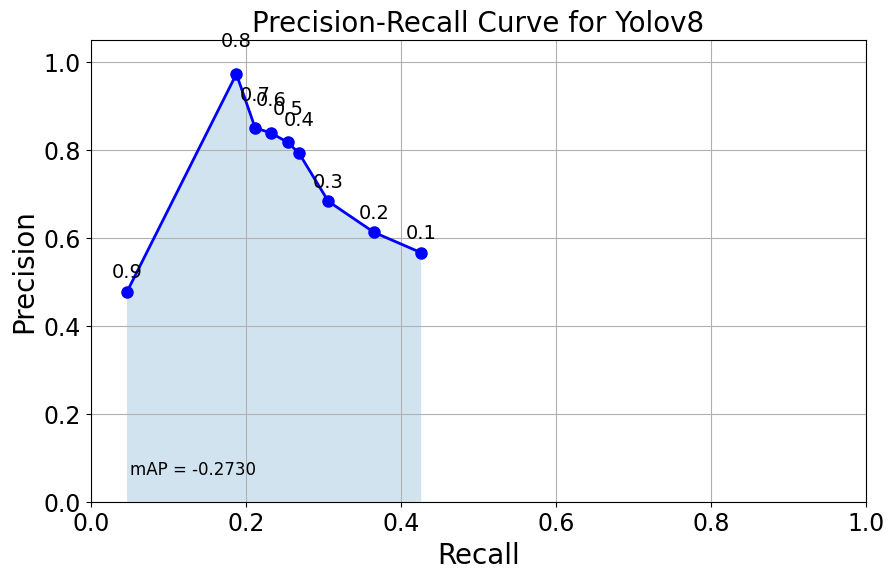

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the validation runs
confidences = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
precisions = [0.5659, 0.6123, 0.6827, 0.7921, 0.8167, 0.8375, 0.8500, 0.9722, 0.4773]
recalls = [0.4263, 0.3654, 0.3065, 0.2687, 0.2542, 0.2331, 0.2120, 0.1879, 0.0468]

# Sort the data by recall
sorted_indices = np.argsort(recalls)[::-1]
recalls_sorted = np.array(recalls)[sorted_indices]
precisions_sorted = np.array(precisions)[sorted_indices]

# Compute the mean average precision (mAP)
mAP = np.trapz(precisions_sorted, recalls_sorted)

# Create the precision-recall curve
plt.figure(figsize=(10, 6))
plt.plot(recalls_sorted, precisions_sorted, 'b-', linewidth=2, marker='o', markersize=8)
plt.fill_between(recalls_sorted, precisions_sorted, alpha=0.2)
plt.xlabel('Recall', fontsize=20)
plt.ylabel('Precision', fontsize=20)
plt.title('Precision-Recall Curve for Yolov8', fontsize=20)

plt.tick_params(axis='x', labelsize=17)
plt.tick_params(axis='y', labelsize=17)

# Add confidence threshold annotations with dynamic offset to avoid overlap
previous_rec = -1
for conf, prec, rec in zip(confidences, precisions, recalls):
    # Adjust vertical offset to avoid overlap with previous annotation
    if previous_rec != -1 and abs(previous_rec - rec) < 0.05:
        y_offset = 20
    else:
        y_offset = 10
    plt.annotate(f'{conf}', (rec, prec), textcoords="offset points", xytext=(0, y_offset), ha='center', fontsize=14)
    previous_rec = rec

# Add mAP to the plot
plt.text(0.05, 0.05, f'mAP = {mAP:.4f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='bottom')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.grid(True)
plt.show()


In [ ]:
!zip -r /content/runs1.zip /content/runs

NotImplementedError: A UTF-8 locale is required. Got ANSI_X3.4-1968

In [ ]:
from google.colab import files
files.download("/content/runs")

## Cls_loss curves for yolov8 and yolov9 code

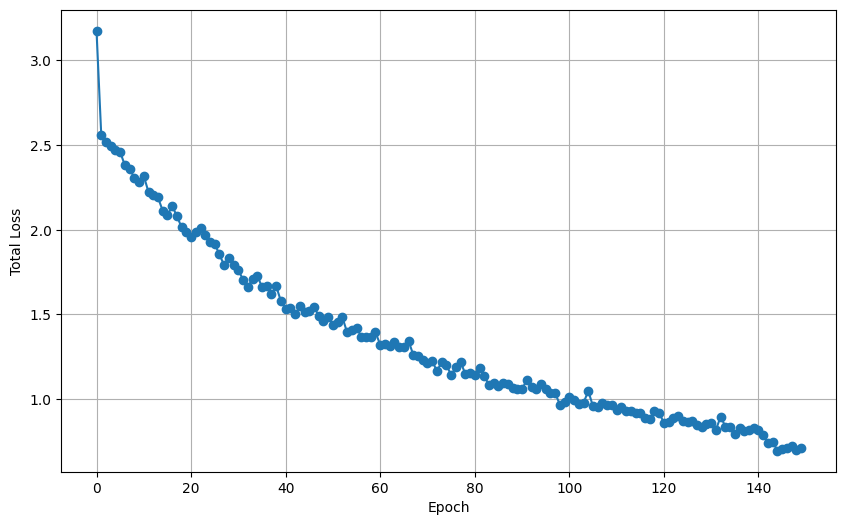

In [ ]:
# For the Yolov9 model

import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = '/content/results.csv'  # Replace with the path to your CSV file
column_name = 'train/cls_loss'  # Replace with the name of the column you want to plot

# Read the CSV file and select the column
data = pd.read_csv(file_path)
#print(data)
column_data = data['         train/cls_loss']

# Plot the column data
plt.figure(figsize=(10, 6))
plt.plot(column_data, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Total Loss')
plt.grid(True)
plt.show()


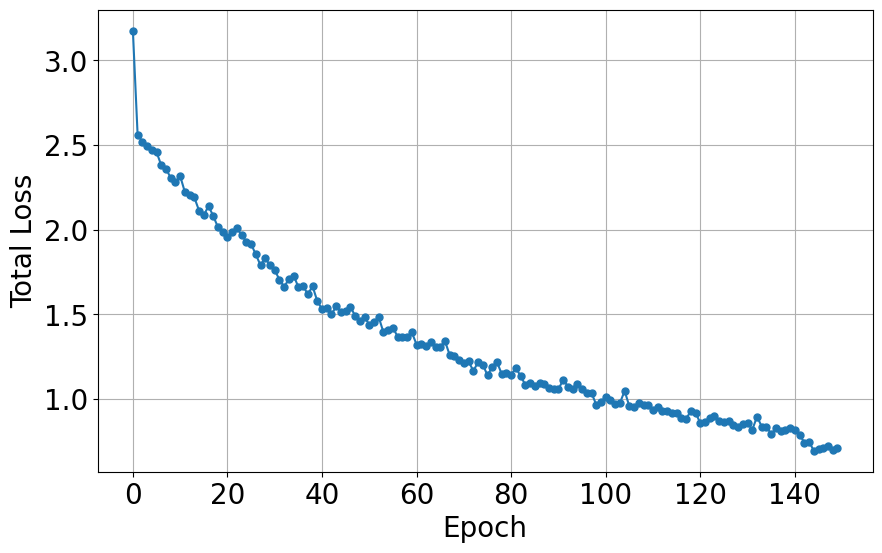

In [ ]:
#Yolov9
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = '/content/results.csv'  # Replace with the path to your CSV file
column_name = 'train/cls_loss'  # Replace with the name of the column you want to plot

# Read the CSV file and select the column
data = pd.read_csv(file_path)
#print(data)
column_data = data['         train/cls_loss']

# Plot the column data
plt.figure(figsize=(10, 6))
plt.plot(column_data, marker='o' ,  markersize=5)

# Set labels with increased font size
plt.xlabel('Epoch', fontsize=20)
plt.ylabel('Total Loss', fontsize=20)

# Increase the font size of the ticks
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Add grid and show the plot
plt.grid(True)
plt.show()


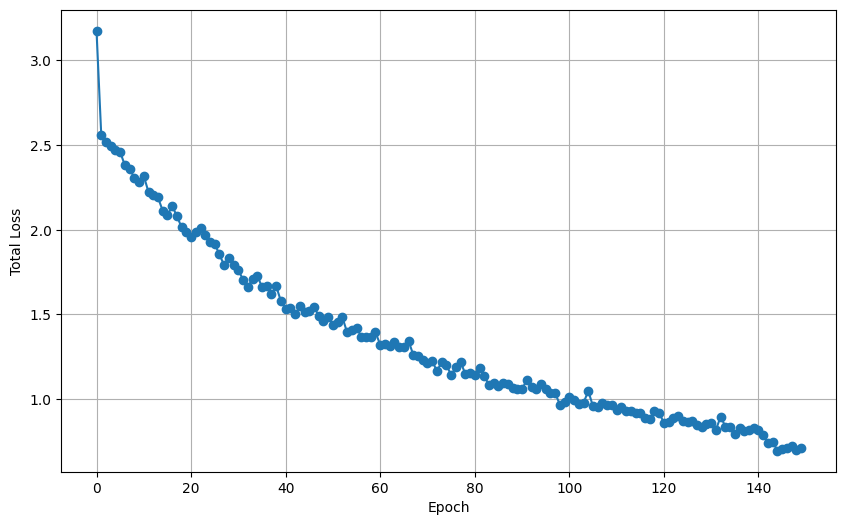

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = '/content/results.csv'  # Replace with the path to your CSV file
column_name = 'train/cls_loss'  # Replace with the name of the column you want to plot

# Read the CSV file and select the column
data = pd.read_csv(file_path)
#print(data)
column_data = data['         train/cls_loss']

# Plot the column data
plt.figure(figsize=(10, 6))
plt.plot(column_data, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Total Loss')
plt.grid(True)
plt.show()